# Libraries

In [4]:
import polars as pl
import matplotlib as plt 
import numpy as np

In [5]:
import random

In [6]:
import scipy

In [10]:
pl.Config.set_tbl_rows(250)

polars.config.Config

# Dataset

In [10]:
data = pl.read_excel('X-RAYS.xlsx')

In [12]:
data

id,codice,id_1,CASO1A4,CASO1B4,CONF4[conf0],PERT4,SIMILIA4,SIMILIB4,UTIL4,HF4,ULTCONF4[conf0],CASO1A11,CASO1B11,CONF11[conf1],PERT11,SIMILIA11,SIMILIB11,UTIL11,HF11,ULTCONF11[conf1],CASO1A7,CASO1B7,CONF7[conf2],PERT7,SIMILIA7,SIMILIB7,UTIL7,HF7,ULTCONF7[conf2],CASO1A3,CASO1B3,CONF3[conf3],PERT3,SIMILIA3,SIMILIB3,UTIL3,…,CASO1A18,CASO1B18,CONF18[conf14],PERT18,SIMILIA18,SIMILIB18,UTIL18,HF18,ULTCONF18[conf14],CASO1A15,CASO1B15,CONF15[conf15],PERT15,SIMILIA15,SIMILIB15,UTIL15,HF15,ULTCONF15[conf15],CASO1A13,CASO1B13,CONF13[conf16],PERT13,SIMILIA13,SIMILIB13,UTIL13,HF13,ULTCONF13[conf16],CASO1A9,CASO1B9,CONF9[conf17],PERT9,SIMILIA9,SIMILIB9,UTIL9,HF9,ULTCONF9[conf17],end
i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
null,null,"""Prego inserisca anche il codic…","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…","""Poiché per il caso in oggetto …","""Poiché per il caso in oggetto …","""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…","""Poiché per il caso in oggetto …","""Poiché per il caso in oggetto …","""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…","""Poiché per il caso in oggetto …","""Poiché per il caso in oggetto …","""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…","""Poiché per il caso in oggetto …","""Poiché per il caso in oggetto …","""Dopo aver visto i casi simili …",…,"""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…","""Poiché per il caso in oggetto …","""Poiché per il caso in oggetto …","""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…","""Poiché per il caso in oggetto …","""Poiché per il caso in oggetto …","""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…","""Poiché per il caso in oggetto …","""Poiché per il caso in oggetto …","""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…","""Poiché per il caso in oggetto …","""Poiché per il caso in oggetto …","""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …",null
1,1,"""5""","""1""",null,null,"""4""",null,null,"""2""","""1""","""3""","""0""",null,"""2""","""4""",null,null,"""3""","""0""","""2""","""0""",null,"""2""","""2""",null,null,"""2""","""0""","""2""","""1""",null,"""3""","""2""",null,null,"""2""",…,"""0""",null,"""3""","""4""",null,null,"""3""","""0""","""3""","""0""",null,"""3""","""4""",null,null,"""2""","""0""","""3""","""0""",null,"""3""","""2""",null,null,"""2""","""0""","""3""","""0""",null,"""

# Data Preparation

In [15]:
# colonna ground truth
# Sensitivity, Specificity, Accuracy per ogni persona
# Metriche del modello
# Rinominare gli id evidenziando i singoli casi
# identificare i soggetti diversi per ogni decisioni
# idcaso, idsoggetto, H1 (merge CASO 1BA e CASOA4)

In [17]:
columns = data.columns

In [19]:
data = data.drop('id_1')

In [21]:
data['SIMILIA8'][0]

'Poiché per il caso in oggetto la Intelligenza Artificiale ha rilevato probabile la "PRESENZA DI FRATTURE", di seguito vedrà i due casi più simili presenti in archivio che la macchina ha classificato allo stesso modo ma, in uno dei due casi, la AI ha commesso un errore rispetto al Gold Standard di riferimento.CASO 1 SIMILE CLASSIFICATO CORRETTAMENTE RISPETTO AL GOLD STANDARDCASO 2 SIMILE CLASSIFICATO SCORRETTAMENTE RISPETTO AL GOLD STANDARD'

In [23]:
data = data.select(pl.exclude("^SIMILIB.*$"))
data.columns

['id',
 'codice',
 'CASO1A4',
 'CASO1B4',
 'CONF4[conf0]',
 'PERT4',
 'SIMILIA4',
 'UTIL4',
 'HF4',
 'ULTCONF4[conf0]',
 'CASO1A11',
 'CASO1B11',
 'CONF11[conf1]',
 'PERT11',
 'SIMILIA11',
 'UTIL11',
 'HF11',
 'ULTCONF11[conf1]',
 'CASO1A7',
 'CASO1B7',
 'CONF7[conf2]',
 'PERT7',
 'SIMILIA7',
 'UTIL7',
 'HF7',
 'ULTCONF7[conf2]',
 'CASO1A3',
 'CASO1B3',
 'CONF3[conf3]',
 'PERT3',
 'SIMILIA3',
 'UTIL3',
 'HF3',
 'ULTCONF3[conf3]',
 'CASO1A10',
 'CASO1B10',
 'CONF10[conf4]',
 'PERT10',
 'SIMILIA10',
 'UTIL10',
 'HF10',
 'ULTCONF10[conf4]',
 'CASO1A6',
 'CASO1B6',
 'CONF6[conf5]',
 'PERT6',
 'SIMILIA6',
 'UTIL6',
 'HF6',
 'ULTCONF6[conf5]',
 'CASO1A2',
 'CASO1B2',
 'CONF2[conf6]',
 'PERT2',
 'SIMILIA2',
 'UTIL2',
 'HF2',
 'ULTCONF2[conf6]',
 'CASO1A17',
 'CASO1B17',
 'CONF17[conf7]',
 'PERT17',
 'SIMILIA17',
 'UTIL17',
 'HF17',
 'ULTCONF17[conf7]',
 'CASO1A1',
 'CASO1B1',
 'CONF1[conf8]',
 'PERT1',
 'SIMILIA1',
 'UTIL1',
 'HF1',
 'ULTCONF1[conf8]',
 'CASO1A12',
 'CASO1B12',
 'CONF12[conf9

In [25]:
# creazione di colonna per indicare se la risposta è affermativa 1 o negativa 0
for i in range(1, 19):
    col_name = f"SIMILIA{i}"
    prima_riga = data[col_name][0]
    contiene_presenza = "PRESENZA" in prima_riga if prima_riga is not None else False
    valore = 1 if contiene_presenza else 0
    data = data.with_columns([
        pl.lit(valore).alias(col_name)
    ])

In [285]:
data

id,codice,CASO1A4,CASO1B4,CONF4[conf0],PERT4,SIMILIA4,UTIL4,HF4,ULTCONF4[conf0],CASO1A11,CASO1B11,CONF11[conf1],PERT11,SIMILIA11,UTIL11,HF11,ULTCONF11[conf1],CASO1A7,CASO1B7,CONF7[conf2],PERT7,SIMILIA7,UTIL7,HF7,ULTCONF7[conf2],CASO1A3,CASO1B3,CONF3[conf3],PERT3,SIMILIA3,UTIL3,HF3,ULTCONF3[conf3],CASO1A10,CASO1B10,CONF10[conf4],…,SIMILIA16,UTIL16,HF16,ULTCONF16[conf13],CASO1A18,CASO1B18,CONF18[conf14],PERT18,SIMILIA18,UTIL18,HF18,ULTCONF18[conf14],CASO1A15,CASO1B15,CONF15[conf15],PERT15,SIMILIA15,UTIL15,HF15,ULTCONF15[conf15],CASO1A13,CASO1B13,CONF13[conf16],PERT13,SIMILIA13,UTIL13,HF13,ULTCONF13[conf16],CASO1A9,CASO1B9,CONF9[conf17],PERT9,SIMILIA9,UTIL9,HF9,ULTCONF9[conf17],end
i64,i64,str,str,str,str,i32,str,str,str,str,str,str,str,i32,str,str,str,str,str,str,str,i32,str,str,str,str,str,str,str,i32,str,str,str,str,str,str,…,i32,str,str,str,str,str,str,str,i32,str,str,str,str,str,str,str,i32,str,str,str,str,str,str,str,i32,str,str,str,str,str,str,str,i32,str,str,str,str
null,null,"""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…",1,"""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…",0,"""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…",0,"""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…",1,"""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …",…,0,"""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…",0,"""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…",0,"""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…",1,"""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …","""Osservi la radiografia e la re…","""Osservi per il tempo necessari…","""In una scala da 1 (per niente …","""Dopo aver visto la mappa di ri…",0,"""Dopo aver visto i casi simili …","""Alla luce dei casi simili recu…","""Per finire, in una scala da 1 …",null
1,1,"""1""",null,null,"""4""",1,"""2""","""1""","""3""","""0""",null,"""2""","""4""",0,"""3""","""0""","""2""","""0""",null,"""2""","""2""",0,"""2""","""0""","""2""","""1""",null,"""3""","""2""",1,"""2""","""1""","""3""","""1""",null,"""3""",…,0,"""3""","""0""","""3""","""0""",null,"""3""","""4""",0,"""3""","""0""","""3""","""0""",null,"""3""","""4""",0,"""2""","""0""","""3""","""0""",null,"""3""","""2""",1,"""2""","""0""","""3""","""0""",null,"""3""","""4""",0,"""2""","""0""","""3""",null
2,2,null,"""1""","""3""","""3""",1,"""3""","""1""","""3""",null,"""0""","""4""","""2""",0,"""2""","""0""","""3""",null,"""1""","""3""","""2""",0,"""2""","""1""","""3""",null,"""1""","""4""","""4""",1,"""2""","""1""","""4""",null,"""0""","""3""",…,0,"""

In [286]:
# unica colonna con dati sparsi in 2 diverse
for a in range(1,19):
    data = data.with_columns(data[f"CASO1A{a}"].fill_null(data[f"CASO1B{a}"]).alias(f"CASO1A{a}"))
    data = data.drop(f"CASO1B{a}")

In [287]:
data.columns

['id',
 'codice',
 'CASO1A4',
 'CONF4[conf0]',
 'PERT4',
 'SIMILIA4',
 'UTIL4',
 'HF4',
 'ULTCONF4[conf0]',
 'CASO1A11',
 'CONF11[conf1]',
 'PERT11',
 'SIMILIA11',
 'UTIL11',
 'HF11',
 'ULTCONF11[conf1]',
 'CASO1A7',
 'CONF7[conf2]',
 'PERT7',
 'SIMILIA7',
 'UTIL7',
 'HF7',
 'ULTCONF7[conf2]',
 'CASO1A3',
 'CONF3[conf3]',
 'PERT3',
 'SIMILIA3',
 'UTIL3',
 'HF3',
 'ULTCONF3[conf3]',
 'CASO1A10',
 'CONF10[conf4]',
 'PERT10',
 'SIMILIA10',
 'UTIL10',
 'HF10',
 'ULTCONF10[conf4]',
 'CASO1A6',
 'CONF6[conf5]',
 'PERT6',
 'SIMILIA6',
 'UTIL6',
 'HF6',
 'ULTCONF6[conf5]',
 'CASO1A2',
 'CONF2[conf6]',
 'PERT2',
 'SIMILIA2',
 'UTIL2',
 'HF2',
 'ULTCONF2[conf6]',
 'CASO1A17',
 'CONF17[conf7]',
 'PERT17',
 'SIMILIA17',
 'UTIL17',
 'HF17',
 'ULTCONF17[conf7]',
 'CASO1A1',
 'CONF1[conf8]',
 'PERT1',
 'SIMILIA1',
 'UTIL1',
 'HF1',
 'ULTCONF1[conf8]',
 'CASO1A12',
 'CONF12[conf9]',
 'PERT12',
 'SIMILIA12',
 'UTIL12',
 'HF12',
 'ULTCONF12[conf9]',
 'CASO1A14',
 'CONF14[conf10]',
 'PERT14',
 'SIMILIA14

In [288]:
# esclusione delle colonne con informazioni inutili
finale = data.select(pl.exclude(["^HF.*$", "^UTIL.*$", "^PERT.*$", "^ULTCONF.*$"]))

In [291]:
finale

id,codice,CASO1A4,CONF4[conf0],SIMILIA4,CASO1A11,CONF11[conf1],SIMILIA11,CASO1A7,CONF7[conf2],SIMILIA7,CASO1A3,CONF3[conf3],SIMILIA3,CASO1A10,CONF10[conf4],SIMILIA10,CASO1A6,CONF6[conf5],SIMILIA6,CASO1A2,CONF2[conf6],SIMILIA2,CASO1A17,CONF17[conf7],SIMILIA17,CASO1A1,CONF1[conf8],SIMILIA1,CASO1A12,CONF12[conf9],SIMILIA12,CASO1A14,CONF14[conf10],SIMILIA14,CASO1A8,CONF8[conf11],SIMILIA8,CASO1A5,CONF5[conf12],SIMILIA5,CASO1A16,CONF16[conf13],SIMILIA16,CASO1A18,CONF18[conf14],SIMILIA18,CASO1A15,CONF15[conf15],SIMILIA15,CASO1A13,CONF13[conf16],SIMILIA13,CASO1A9,CONF9[conf17],SIMILIA9,end
i64,i64,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str
null,null,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",1,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",0,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",0,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",1,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",0,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",0,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",1,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",1,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",1,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",0,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",1,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",1,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",1,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",0,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",0,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",0,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",1,"""Osservi la radiografia e la re…","""In una scala da 1 (per niente …",0,null
1,1,"""1""",null,1,"""0""","""2""",0,"""0""","""2""",0,"""1""","""3""",1,"""1""","""3""",0,"""1""","""2""",0,"""1""","""3""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""4""",0,"""0""","""3""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
2,2,"""1""","""3""",1,"""0""","""4""",0,"""1""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""4""",0,"""0""","""2""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""2""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
3,1,"""1""","""3""",1,"""1""","""2""",0,"""0""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""3""",0,"""0""","""3""",1,"""1""","""4""",1,"""1""","""4""",1,"""1""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""2""",1,"""0""","""2""",0,null
4,2,"""1""","""4""",1,"""0""","""2""",0,"""1""","""1""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""4""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""3""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""2""",0,"""0""","""3""",0,"""0""","""2""",1,"""0""","""3""",0,null
5,1,"""0""","""1""",1,"""0""","""4""",0,"""0""","""1""",0,"""1""","""3""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""4""",0,"""0""","""2""",1,"""1""","""4""",1,"""1""","""4""",1,"""1""","""3""",0,"""0""","""3""",0,"""1""","""1""",0,"""0""","""3""",1,"""0""","""4""",0,null
6,2,"""1""","""2""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""3""",1,"""0""","""4""",0,"""1""","""3""",0,"""1""","""4""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""",

In [292]:
#rimozione della prima riga
finale = finale.filter(pl.arange(0, data.height) != 0)

In [293]:
finale = finale.drop('codice')

In [295]:
finale

id,CASO1A4,CONF4[conf0],SIMILIA4,CASO1A11,CONF11[conf1],SIMILIA11,CASO1A7,CONF7[conf2],SIMILIA7,CASO1A3,CONF3[conf3],SIMILIA3,CASO1A10,CONF10[conf4],SIMILIA10,CASO1A6,CONF6[conf5],SIMILIA6,CASO1A2,CONF2[conf6],SIMILIA2,CASO1A17,CONF17[conf7],SIMILIA17,CASO1A1,CONF1[conf8],SIMILIA1,CASO1A12,CONF12[conf9],SIMILIA12,CASO1A14,CONF14[conf10],SIMILIA14,CASO1A8,CONF8[conf11],SIMILIA8,CASO1A5,CONF5[conf12],SIMILIA5,CASO1A16,CONF16[conf13],SIMILIA16,CASO1A18,CONF18[conf14],SIMILIA18,CASO1A15,CONF15[conf15],SIMILIA15,CASO1A13,CONF13[conf16],SIMILIA13,CASO1A9,CONF9[conf17],SIMILIA9,end
i64,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str
1,"""1""",null,1,"""0""","""2""",0,"""0""","""2""",0,"""1""","""3""",1,"""1""","""3""",0,"""1""","""2""",0,"""1""","""3""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""4""",0,"""0""","""3""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
2,"""1""","""3""",1,"""0""","""4""",0,"""1""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""4""",0,"""0""","""2""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""2""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
3,"""1""","""3""",1,"""1""","""2""",0,"""0""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""3""",0,"""0""","""3""",1,"""1""","""4""",1,"""1""","""4""",1,"""1""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""2""",1,"""0""","""2""",0,null
4,"""1""","""4""",1,"""0""","""2""",0,"""1""","""1""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""4""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""3""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""2""",0,"""0""","""3""",0,"""0""","""2""",1,"""0""","""3""",0,null
5,"""0""","""1""",1,"""0""","""4""",0,"""0""","""1""",0,"""1""","""3""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""4""",0,"""0""","""2""",1,"""1""","""4""",1,"""1""","""4""",1,"""1""","""3""",0,"""0""","""3""",0,"""1""","""1""",0,"""0""","""3""",1,"""0""","""4""",0,null
6,"""1""","""2""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""3""",1,"""0""","""4""",0,"""1""","""3""",0,"""1""","""4""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""2""",0,"""0""","""3""",1,"""1""","""2""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""1""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""1""",0,null
7,"""0""","""1""",1,"""0""","""2""",0,"""1""","""1""",0,"""1""","""2""",1,"""0""","""3""",0,"""0""","""3""",0,"""1""","""2""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""2""",1,"""1""","""2""",1,"""1""","""3""",1,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
8,"""1""","""3""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""4""",1,"""1""","""4""",1,"""0""","""4""",1,"""0""","""3""",0,"""1""","""2""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""4""",0,"""0""","""4""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
10,"""1""","""3""",1,"""1""","""2""",0,"""0""","""1""",0,"""1""","""2""",1,"""0""","""2""",0,"""1""","""2""",0,"""1""","""3""",1,"""1""","""3""",1,"""1""","""2""",1,"""1""","""2""",0,"""1""","""1""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""1""",0,"""0""","""1""",0,"""0""","""2""",1,"""0""","""2""",0,null


In [296]:
#rinomina delle colonne
import re

rename_dict = {}
seen = set()

for i in range(1, 19):
    pattern = re.compile(f"^CONF{i}.*$")
    for col in finale.columns:
        if pattern.match(col) and f"CONF{i}" not in seen:
            rename_dict[col] = f"CONF{i}"
            seen.add(f"CONF{i}")
            break  # Evita rinomina multipla per stesso target

# Applica la rinomina
finale = finale.rename(rename_dict)


In [303]:
finale

id,CASO1A4,CONF4,SIMILIA4,CASO1A11,CONF11,SIMILIA11,CASO1A7,CONF7,SIMILIA7,CASO1A3,CONF3,SIMILIA3,CASO1A10,CONF10,SIMILIA10,CASO1A6,CONF6,SIMILIA6,CASO1A2,CONF2,SIMILIA2,CASO1A17,CONF17,SIMILIA17,CASO1A1,CONF1[conf8],SIMILIA1,CASO1A12,CONF12,SIMILIA12,CASO1A14,CONF14,SIMILIA14,CASO1A8,CONF8,SIMILIA8,CASO1A5,CONF5,SIMILIA5,CASO1A16,CONF16,SIMILIA16,CASO1A18,CONF18,SIMILIA18,CASO1A15,CONF15,SIMILIA15,CASO1A13,CONF13,SIMILIA13,CASO1A9,CONF9,SIMILIA9,end
i64,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str
1,"""1""",null,1,"""0""","""2""",0,"""0""","""2""",0,"""1""","""3""",1,"""1""","""3""",0,"""1""","""2""",0,"""1""","""3""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""4""",0,"""0""","""3""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
2,"""1""","""3""",1,"""0""","""4""",0,"""1""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""4""",0,"""0""","""2""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""2""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
3,"""1""","""3""",1,"""1""","""2""",0,"""0""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""3""",0,"""0""","""3""",1,"""1""","""4""",1,"""1""","""4""",1,"""1""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""2""",1,"""0""","""2""",0,null
4,"""1""","""4""",1,"""0""","""2""",0,"""1""","""1""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""4""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""3""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""2""",0,"""0""","""3""",0,"""0""","""2""",1,"""0""","""3""",0,null
5,"""0""","""1""",1,"""0""","""4""",0,"""0""","""1""",0,"""1""","""3""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""4""",0,"""0""","""2""",1,"""1""","""4""",1,"""1""","""4""",1,"""1""","""3""",0,"""0""","""3""",0,"""1""","""1""",0,"""0""","""3""",1,"""0""","""4""",0,null
6,"""1""","""2""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""3""",1,"""0""","""4""",0,"""1""","""3""",0,"""1""","""4""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""2""",0,"""0""","""3""",1,"""1""","""2""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""1""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""1""",0,null
7,"""0""","""1""",1,"""0""","""2""",0,"""1""","""1""",0,"""1""","""2""",1,"""0""","""3""",0,"""0""","""3""",0,"""1""","""2""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""2""",1,"""1""","""2""",1,"""1""","""3""",1,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
8,"""1""","""3""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""4""",1,"""1""","""4""",1,"""0""","""4""",1,"""0""","""3""",0,"""1""","""2""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""4""",0,"""0""","""4""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
10,"""1""","""3""",1,"""1""","""2""",0,"""0""","""1""",0,"""1""","""2""",1,"""0""","""2""",0,"""1""","""2""",0,"""1""","""3""",1,"""1""","""3""",1,"""1""","""2""",1,"""1""","""2""",0,"""1""","""1""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""1""",0,"""0""","""1""",0,"""0""","""2""",1,"""0""","""2""",0,null


In [305]:
#aggiunta della colonna id con numeri da 1 a 16 senza buchi
finale = finale.with_columns(pl.Series('id', range(1,17)))

In [307]:
finale

id,CASO1A4,CONF4,SIMILIA4,CASO1A11,CONF11,SIMILIA11,CASO1A7,CONF7,SIMILIA7,CASO1A3,CONF3,SIMILIA3,CASO1A10,CONF10,SIMILIA10,CASO1A6,CONF6,SIMILIA6,CASO1A2,CONF2,SIMILIA2,CASO1A17,CONF17,SIMILIA17,CASO1A1,CONF1[conf8],SIMILIA1,CASO1A12,CONF12,SIMILIA12,CASO1A14,CONF14,SIMILIA14,CASO1A8,CONF8,SIMILIA8,CASO1A5,CONF5,SIMILIA5,CASO1A16,CONF16,SIMILIA16,CASO1A18,CONF18,SIMILIA18,CASO1A15,CONF15,SIMILIA15,CASO1A13,CONF13,SIMILIA13,CASO1A9,CONF9,SIMILIA9,end
i64,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str,str,i32,str
1,"""1""",null,1,"""0""","""2""",0,"""0""","""2""",0,"""1""","""3""",1,"""1""","""3""",0,"""1""","""2""",0,"""1""","""3""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""4""",0,"""0""","""3""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
2,"""1""","""3""",1,"""0""","""4""",0,"""1""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""4""",0,"""0""","""2""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""2""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
3,"""1""","""3""",1,"""1""","""2""",0,"""0""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""3""",0,"""0""","""3""",1,"""1""","""4""",1,"""1""","""4""",1,"""1""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""2""",1,"""0""","""2""",0,null
4,"""1""","""4""",1,"""0""","""2""",0,"""1""","""1""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""4""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""3""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""2""",0,"""0""","""3""",0,"""0""","""2""",1,"""0""","""3""",0,null
5,"""0""","""1""",1,"""0""","""4""",0,"""0""","""1""",0,"""1""","""3""",1,"""0""","""3""",0,"""1""","""2""",0,"""1""","""4""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""4""",0,"""0""","""2""",1,"""1""","""4""",1,"""1""","""4""",1,"""1""","""3""",0,"""0""","""3""",0,"""1""","""1""",0,"""0""","""3""",1,"""0""","""4""",0,null
6,"""1""","""2""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""3""",1,"""0""","""4""",0,"""1""","""3""",0,"""1""","""4""",1,"""1""","""4""",1,"""1""","""4""",1,"""0""","""2""",0,"""0""","""3""",1,"""1""","""2""",1,"""1""","""4""",1,"""0""","""3""",0,"""0""","""1""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""1""",0,null
7,"""0""","""1""",1,"""0""","""2""",0,"""1""","""1""",0,"""1""","""2""",1,"""0""","""3""",0,"""0""","""3""",0,"""1""","""2""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""2""",1,"""1""","""2""",1,"""1""","""3""",1,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
8,"""1""","""3""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""4""",1,"""0""","""3""",0,"""1""","""3""",0,"""1""","""4""",1,"""1""","""4""",1,"""0""","""4""",1,"""0""","""3""",0,"""1""","""2""",1,"""1""","""3""",1,"""1""","""4""",1,"""0""","""4""",0,"""0""","""4""",0,"""0""","""3""",0,"""0""","""3""",1,"""0""","""3""",0,null
9,"""1""","""3""",1,"""1""","""2""",0,"""0""","""1""",0,"""1""","""2""",1,"""0""","""2""",0,"""1""","""2""",0,"""1""","""3""",1,"""1""","""3""",1,"""1""","""2""",1,"""1""","""2""",0,"""1""","""1""",1,"""1""","""3""",1,"""1""","""3""",1,"""0""","""2""",0,"""0""","""1""",0,"""0""","""1""",0,"""0""","""2""",1,"""0""","""2""",0,null


In [309]:
finale.columns

['id',
 'CASO1A4',
 'CONF4',
 'SIMILIA4',
 'CASO1A11',
 'CONF11',
 'SIMILIA11',
 'CASO1A7',
 'CONF7',
 'SIMILIA7',
 'CASO1A3',
 'CONF3',
 'SIMILIA3',
 'CASO1A10',
 'CONF10',
 'SIMILIA10',
 'CASO1A6',
 'CONF6',
 'SIMILIA6',
 'CASO1A2',
 'CONF2',
 'SIMILIA2',
 'CASO1A17',
 'CONF17',
 'SIMILIA17',
 'CASO1A1',
 'CONF1[conf8]',
 'SIMILIA1',
 'CASO1A12',
 'CONF12',
 'SIMILIA12',
 'CASO1A14',
 'CONF14',
 'SIMILIA14',
 'CASO1A8',
 'CONF8',
 'SIMILIA8',
 'CASO1A5',
 'CONF5',
 'SIMILIA5',
 'CASO1A16',
 'CONF16',
 'SIMILIA16',
 'CASO1A18',
 'CONF18',
 'SIMILIA18',
 'CASO1A15',
 'CONF15',
 'SIMILIA15',
 'CASO1A13',
 'CONF13',
 'SIMILIA13',
 'CASO1A9',
 'CONF9',
 'SIMILIA9',
 'end']

### Divisione per casi

In [312]:
#isoliamo le colonne relative ai diversi casi
esp1 = finale['id', 'CASO1A1', 'CONF1[conf8]',	'SIMILIA1']

In [314]:
esp2 = finale['id', 'CASO1A2', 'CONF2',	'SIMILIA2']
esp3 = finale['id', 'CASO1A3', 'CONF3',	'SIMILIA3']
esp4 = finale['id', 'CASO1A4', 'CONF4',	'SIMILIA4']
esp5 = finale['id', 'CASO1A5', 'CONF5',	'SIMILIA5']
esp6 = finale['id', 'CASO1A6', 'CONF6',	'SIMILIA6']
esp7 = finale['id', 'CASO1A7', 'CONF7',	'SIMILIA7']
esp8 = finale['id', 'CASO1A8', 'CONF8',	'SIMILIA8']
esp9 = finale['id', 'CASO1A9', 'CONF9',	'SIMILIA9']
esp10 = finale['id', 'CASO1A10', 'CONF10',	'SIMILIA10']
esp11 = finale['id', 'CASO1A11', 'CONF11',	'SIMILIA11']
esp12 = finale['id', 'CASO1A12', 'CONF12',	'SIMILIA12']
esp13 = finale['id', 'CASO1A13', 'CONF13',	'SIMILIA13']
esp14 = finale['id', 'CASO1A14', 'CONF14',	'SIMILIA14']
esp15 = finale['id', 'CASO1A15', 'CONF15',	'SIMILIA15']
esp16 = finale['id', 'CASO1A16', 'CONF16',	'SIMILIA16']
esp17 = finale['id', 'CASO1A17', 'CONF17',	'SIMILIA17']
esp18= finale['id', 'CASO1A18', 'CONF18', 'SIMILIA18']

In [316]:
# aggiunta di una colonna identificativa del caso 
esp1 = esp1.with_columns(pl.lit('a').alias('idC'))
esp1 = esp1.rename({
    'CASO1A1': 'HD',
    'CONF1[conf8]': 'ConfH',
    'SIMILIA1': 'AI'
})

In [318]:
esp1

id,HD,ConfH,AI,idC
i64,str,str,i32,str
1,"""1""","""3""",1,"""a"""
2,"""1""","""4""",1,"""a"""
3,"""1""","""3""",1,"""a"""
4,"""1""","""3""",1,"""a"""
5,"""1""","""3""",1,"""a"""
6,"""1""","""4""",1,"""a"""
7,"""1""","""3""",1,"""a"""
8,"""0""","""4""",1,"""a"""
9,"""1""","""2""",1,"""a"""


In [320]:
esp2 = esp2.with_columns(pl.lit('b').alias('idC'))
esp2 = esp2.rename({
    'CASO1A2': 'HD',
    'CONF2': 'ConfH',
    'SIMILIA2': 'AI'
})

In [322]:
esp3 = esp3.with_columns(pl.lit('c').alias('idC'))
esp3 = esp3.rename({
    'CASO1A3': 'HD',
    'CONF3': 'ConfH',
    'SIMILIA3': 'AI'
})

In [324]:
esp4 = esp4.with_columns(pl.lit('d').alias('idC'))
esp4 = esp4.rename({
    'CASO1A4': 'HD',
    'CONF4': 'ConfH',
    'SIMILIA4': 'AI'
})

In [326]:
esp5 = esp5.with_columns(pl.lit('e').alias('idC'))
esp5 = esp5.rename({
    'CASO1A5': 'HD',
    'CONF5': 'ConfH',
    'SIMILIA5': 'AI'
})

In [328]:
esp6 = esp6.with_columns(pl.lit('f').alias('idC'))
esp6 = esp6.rename({
    'CASO1A6': 'HD',
    'CONF6': 'ConfH',
    'SIMILIA6': 'AI'
})

In [330]:
esp7 = esp7.with_columns(pl.lit('g').alias('idC'))
esp7 = esp7.rename({
    'CASO1A7': 'HD',
    'CONF7': 'ConfH',
    'SIMILIA7': 'AI'
})

In [332]:
esp8 = esp8.with_columns(pl.lit('h').alias('idC'))
esp8 = esp8.rename({
    'CASO1A8': 'HD',
    'CONF8': 'ConfH',
    'SIMILIA8': 'AI'
})

In [334]:
esp9 = esp9.with_columns(pl.lit('i').alias('idC'))
esp9 = esp9.rename({
    'CASO1A9': 'HD',
    'CONF9': 'ConfH',
    'SIMILIA9': 'AI'
})

In [336]:
esp10 = esp10.with_columns(pl.lit('l').alias('idC'))
esp10 = esp10.rename({
    'CASO1A10': 'HD',
    'CONF10': 'ConfH',
    'SIMILIA10': 'AI'
})

In [338]:
esp11 = esp11.with_columns(pl.lit('m').alias('idC'))
esp11 = esp11.rename({
    'CASO1A11': 'HD',
    'CONF11': 'ConfH',
    'SIMILIA11': 'AI'
})

In [340]:
esp12 = esp12.with_columns(pl.lit('n').alias('idC'))
esp12 = esp12.rename({
    'CASO1A12': 'HD',
    'CONF12': 'ConfH',
    'SIMILIA12': 'AI'
})

In [342]:
esp13 = esp13.with_columns(pl.lit('o').alias('idC'))
esp13 = esp13.rename({
    'CASO1A13': 'HD',
    'CONF13': 'ConfH',
    'SIMILIA13': 'AI'
})

In [344]:
esp14 = esp14.with_columns(pl.lit('p').alias('idC'))
esp14 = esp14.rename({
    'CASO1A14': 'HD',
    'CONF14': 'ConfH',
    'SIMILIA14': 'AI'
})

In [346]:
esp15 = esp15.with_columns(pl.lit('q').alias('idC'))
esp15 = esp15.rename({
    'CASO1A15': 'HD',
    'CONF15': 'ConfH',
    'SIMILIA15': 'AI'
})

In [348]:
esp16 = esp16.with_columns(pl.lit('r').alias('idC'))
esp16 = esp16.rename({
    'CASO1A16': 'HD',
    'CONF16': 'ConfH',
    'SIMILIA16': 'AI'
})

In [350]:
esp17 = esp17.with_columns(pl.lit('s').alias('idC'))
esp17 = esp17.rename({
    'CASO1A17': 'HD',
    'CONF17': 'ConfH',
    'SIMILIA17': 'AI'
})

In [352]:
esp18 = esp18.with_columns(pl.lit('t').alias('idC'))
esp18 = esp18.rename({
    'CASO1A18': 'HD',
    'CONF18': 'ConfH',
    'SIMILIA18': 'AI'
})

In [354]:
final = pl.concat([esp1, esp2, esp3, esp4, esp5, esp6, esp7, esp8, esp9, esp10, esp11, esp12, esp13, esp14, esp15, esp16, esp17, esp18], how="vertical")

In [356]:
final

id,HD,ConfH,AI,idC
i64,str,str,i32,str
1,"""1""","""3""",1,"""a"""
2,"""1""","""4""",1,"""a"""
3,"""1""","""3""",1,"""a"""
4,"""1""","""3""",1,"""a"""
5,"""1""","""3""",1,"""a"""
6,"""1""","""4""",1,"""a"""
7,"""1""","""3""",1,"""a"""
8,"""0""","""4""",1,"""a"""
9,"""1""","""2""",1,"""a"""


### Aggiunta della confidenza

In [359]:
final = final.with_columns(ConfH=pl.col("ConfH").str.replace("2", "0.50"))
final = final.with_columns(ConfH=pl.col("ConfH").str.replace("3", "0.75"))
final = final.with_columns(ConfH=pl.col("ConfH").str.replace("4", "1"))
final = final.with_columns(ConfH=pl.col("ConfH").str.replace("1", "0.25"))

In [361]:
final

id,HD,ConfH,AI,idC
i64,str,str,i32,str
1,"""1""","""0.75""",1,"""a"""
2,"""1""","""0.25""",1,"""a"""
3,"""1""","""0.75""",1,"""a"""
4,"""1""","""0.75""",1,"""a"""
5,"""1""","""0.75""",1,"""a"""
6,"""1""","""0.25""",1,"""a"""
7,"""1""","""0.75""",1,"""a"""
8,"""0""","""0.25""",1,"""a"""
9,"""1""","""0.50""",1,"""a"""


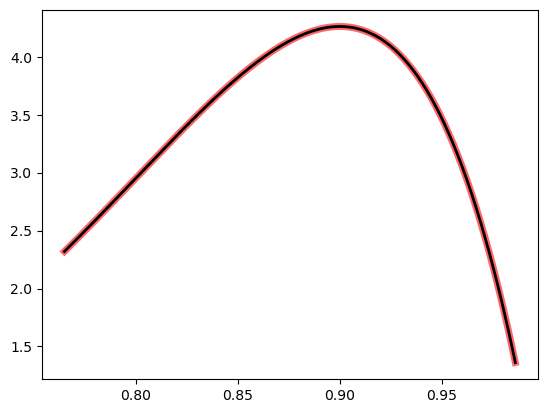

In [363]:
import matplotlib.pyplot as plt
from scipy.stats import beta
# task a,b,c,d,e,h,i,l,m,n,q,r,s,t
fig, ax = plt.subplots(1, 1)
a, b = 10, 2
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

x = np.linspace(beta.ppf(0.23, a, b),
                beta.ppf(0.99, a, b), 300)
ax.plot(x, beta.pdf(x, a, b), 'r', lw=5, alpha=0.6, label='beta pdf')

rv = beta(a, b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [365]:
random.seed(42) 
estratti = random.choices(x, k=288)

In [367]:
min(estratti)

0.7650156777698681

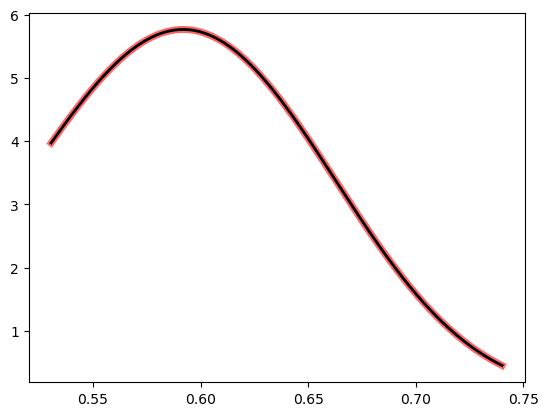

In [369]:
#f,g,o,p
fig, ax = plt.subplots(1, 1)
a, b = 30, 21
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

x2 = np.linspace(beta.ppf(0.2, a, b),
                beta.ppf(0.99, a, b), 300)
ax.plot(x2, beta.pdf(x2, a, b), 'r', lw=5, alpha=0.6, label='beta pdf')

rv = beta(a, b)
ax.plot(x2, rv.pdf(x2), 'k-', lw=2, label='frozen pdf')

In [371]:
random.seed(42) 
estratti2 = random.choices(x2, k=288)
max(estratti2)

0.7400643141810899

In [373]:
final = final.with_columns([
    pl.Series("Conf", estratti),
    pl.Series("ConfL", estratti2)
])

In [375]:
final = final.with_columns([
    pl.when(pl.col("idC") != 'f')
      .then(pl.col("AI"))
      .otherwise(1)
      .alias("AI")
])

final = final.with_columns([
    pl.when(pl.col("idC") != 'o')
      .then(pl.col("AI"))
      .otherwise(0)
      .alias("AI")
])

In [377]:
final = final.with_columns([
    pl.when(pl.col("idC").is_in(['g','p']))
      .then(pl.col("ConfL"))
      .otherwise(pl.col("Conf"))
      .alias("Conf")
])

final = final.drop('ConfL')

### Aggiunta Ground truth

In [19]:
gt = pl.read_excel('XRAYS-GT.xlsx')
gt

CASO1A4,CASO1A11,CASO1A7,CASO1A3,CASO1A10,CASO1A6,CASO1A2,CASO1A17,CASO1A1,CASO1A12,CASO1A14,CASO1A8,CASO1A5,CASO1A16,CASO1A18,CASO1A15,CASO1A13,CASO1A9
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0


In [21]:
gt = gt.rename({ 'CASO1A4': 'd'	,'CASO1A11': 'm','CASO1A7':	'g','CASO1A3':	'c','CASO1A10':	'l','CASO1A6':	'f','CASO1A2':	'b','CASO1A17':	's','CASO1A1': 'a', 'CASO1A12': 'n', 'CASO1A14': 'p','CASO1A8': 'h','CASO1A5':	'e','CASO1A16': 'r'	,'CASO1A18':'t','CASO1A15': 'q','CASO1A13':'o'	,'CASO1A9': 'i'})
gt = gt.transpose(include_header=True)

In [23]:
gt = gt.rename({ 'column': 'idC', 'column_0': 'GT'})

In [25]:
gt

idC,GT
str,i64
"""d""",1
"""m""",0
"""g""",1
"""c""",1
"""l""",0
"""f""",1
"""b""",1
"""s""",1
"""a""",1


In [386]:
final = final.join(gt, on = 'idC')
final.head()

id,HD,ConfH,AI,idC,Conf,GT
i64,str,str,i32,str,f64,i64
1,"""1""","""0.75""",1,"""a""",0.906138,1
2,"""1""","""0.25""",1,"""a""",0.770188,1
3,"""1""","""0.75""",1,"""a""",0.825602,1
4,"""1""","""0.75""",1,"""a""",0.81378,1
5,"""1""","""0.75""",1,"""a""",0.927565,1


In [388]:
final = final.with_columns(pl.col("HD").cast(pl.Int32))

### Aggiunta delle Accuracy, Sensitivity e Specificity di ogni persona

In [391]:
list =[]
acc = []
for i in range(1,17):
    giusto = 0
    temp = final.filter(pl.col('id') == i)
    for j in range(0,18):
        if temp['HD'][j] == temp['GT'][j]:
            giusto = giusto + 1
    giuste = giusto/18
    list.append(i)
    acc.append(round(giuste, 2))

acc    

[0.89,
 1.0,
 0.83,
 1.0,
 0.78,
 1.0,
 0.89,
 0.89,
 0.78,
 0.83,
 0.89,
 0.78,
 0.94,
 0.89,
 0.83,
 0.89]

In [393]:
import numpy as np
np.median(acc)

0.89

In [395]:
accuracy = pl.DataFrame({
    "HACC": acc,
    "id": list
})

In [397]:
final = final.join(accuracy, on= 'id')

In [399]:
final = final.with_columns(pl.col('HACC'))

In [401]:
final = final.with_columns(pl.col('Conf').round(2))

In [403]:
list =[]
spec = []

for i in range(1,17):
    giusto = 0
    temp = final.filter(pl.col('id') == i)
    for j in range(0,18):
        if (temp['HD'][j] == 0) & (temp['GT'][j] == 0):
            giusto = giusto + 1
    giuste = giusto/9
    list.append(i)
    spec.append(round(giuste,2))

spec

[0.89,
 1.0,
 0.78,
 1.0,
 0.78,
 1.0,
 1.0,
 0.89,
 0.67,
 0.89,
 1.0,
 0.67,
 0.89,
 0.78,
 0.89,
 1.0]

In [405]:
specificity = pl.DataFrame({
    "HSPEC": spec,
    "id": list
})

In [407]:
final = final.join(specificity, on= 'id')

In [409]:
list =[]
sens = []

for i in range(1,17):
    giusto = 0
    temp = final.filter(pl.col('id') == i)
    for j in range(0,18):
        if (temp['HD'][j] == 1) & (temp['GT'][j] == 1):
            giusto = giusto + 1
    giuste = giusto/9
    list.append(i)
    sens.append(round(giuste,2))

sens

[0.89,
 1.0,
 0.89,
 1.0,
 0.78,
 1.0,
 0.78,
 0.89,
 0.89,
 0.78,
 0.78,
 0.89,
 1.0,
 1.0,
 0.78,
 0.78]

In [411]:
sensitivity = pl.DataFrame({
    "HSENS": sens,
    "id": list
})

In [413]:
final = final.join(sensitivity, on= 'id')
final

id,HD,ConfH,AI,idC,Conf,GT,HACC,HSPEC,HSENS
i64,i32,str,i32,str,f64,i64,f64,f64,f64
1,1,"""0.75""",1,"""a""",0.91,1,0.89,0.89,0.89
2,1,"""0.25""",1,"""a""",0.77,1,1.0,1.0,1.0
3,1,"""0.75""",1,"""a""",0.83,1,0.83,0.78,0.89
4,1,"""0.75""",1,"""a""",0.81,1,1.0,1.0,1.0
5,1,"""0.75""",1,"""a""",0.93,1,0.78,0.78,0.78
6,1,"""0.25""",1,"""a""",0.92,1,1.0,1.0,1.0
7,1,"""0.75""",1,"""a""",0.96,1,0.89,1.0,0.78
8,0,"""0.25""",1,"""a""",0.78,1,0.89,0.89,0.89
9,1,"""0.50""",1,"""a""",0.86,1,0.78,0.67,0.89


### Aggiunta delle Accuracy, Sensitivity e Specificity della macchina

In [415]:
# sensitività della macchina
temp = final.filter(pl.col('id') == 1)
num = 0
for i in range (0,18):
    if (temp['AI'][i] == 0) & (temp['GT'][i] == 0):
        num = num +1
    AI_sens = num/9
round(AI_sens, 2)   

0.89

In [417]:
# specificità della macchina 
temp = final.filter(pl.col('id') == 1)
num = 0
for i in range (0,18):
    if (temp['AI'][i] == 1) & (temp['GT'][i] == 1):
        num = num +1
    AI_spec = num/9
round(AI_spec,2)

0.89

In [419]:
#accuratezza della macchina 
temp = final.filter(pl.col('id') == 1)
num = 0
for i in range (0,18):
    if ((temp['AI'][i] == 1) & (temp['GT'][i] == 1)) or ((temp['AI'][i] == 0) & (temp['GT'][i] == 0)):
        num = num +1
    AI_acc = num/18
round(AI_acc, 2) 

0.89

In [421]:
final =  final.with_columns(pl.col("ConfH").cast(pl.Float32))

In [423]:
final.head()

id,HD,ConfH,AI,idC,Conf,GT,HACC,HSPEC,HSENS
i64,i32,f32,i32,str,f64,i64,f64,f64,f64
1,1,0.75,1,"""a""",0.91,1,0.89,0.89,0.89
2,1,0.25,1,"""a""",0.77,1,1.0,1.0,1.0
3,1,0.75,1,"""a""",0.83,1,0.83,0.78,0.89
4,1,0.75,1,"""a""",0.81,1,1.0,1.0,1.0
5,1,0.75,1,"""a""",0.93,1,0.78,0.78,0.78


### Riempimento dei missing values

In [425]:
final.filter(pl.col('ConfH').is_null())

id,HD,ConfH,AI,idC,Conf,GT,HACC,HSPEC,HSENS
i64,i32,f32,i32,str,f64,i64,f64,f64,f64
1,1,null,1,"""d""",0.91,1,0.89,0.89,0.89
11,0,null,0,"""i""",0.93,0,0.89,1.0,0.78


In [441]:
final.filter((pl.col('ConfH').is_null()) & (pl.col('idC') == 'i'))['ConfH']

ConfH
f32
null


In [449]:
# riampimento dei missing value con la confidenza media delle persone per quel caso

mean_confi = round(final.filter(pl.col("idC") == 'i').select(pl.col("ConfH").mean()).item(), 2)

final = final.with_columns(
    pl.when((pl.col("ConfH").is_null()) & (pl.col("idC") == 'i'))
      .then(mean_confi)
      .otherwise(pl.col("ConfH"))
      .alias("ConfH")
)


In [451]:
mean_confd = round(final.filter(pl.col("idC") == 'd').select(pl.col("ConfH").mean()).item(), 2)

final = final.with_columns(
    pl.when((pl.col("ConfH").is_null()) & (pl.col("idC") == 'd'))
      .then(mean_confd)
      .otherwise(pl.col("ConfH"))
      .alias("ConfH")
)

# Metodi Coordinamento

In [453]:
class coordinamento:
    def __init__(self, nome):
        self.nome = f'Mi chiamo {nome}'
        
#1. Simple-Majority Protocol: The first and second observer provide their judgments, the third observer is involved if and only if the first two observers disagree. The final decision is the majority choice of the three observers in the team.

    def simp_maj(self,df, id_caso):
        
        risposte = []
        # Filtra solo le righe con l'id_risposta specificato
        caso = df.filter(pl.col('idC') == id_caso)
    
        # Controlla se ci sono abbastanza righe per procedere (almeno 2 persone)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        num = 0
        for i in range(0,16):
            m = caso['HD'][i]
            
            #dis = 0
            if m == caso['AI'][i]:
                #print(f'Uomo e macchina concordano e hanno scelto {m} per il caso {id_caso}') 
                num = num+1
                risposte.append(m)
            else:
                for j in range(0,16):
                    if j != i:
                        if m == caso['HD'][j]:
                            risposte.append(m)
                        else:
                            risposte.append(caso['AI'][i])
        print(f'{num} persone corcordano con la macchina nel coordinamento Simple Majority')
        risposte = np.array(risposte)
        risposte = risposte.T
        
        return risposte
            
#2. Accuracy-Oriented Protocol: 
    
    def acc_mean(self,df, id_caso, AI_acc):
        
        risposte = []
            # Filtra solo le righe con l'id_risposta specificato
        caso = df.filter(pl.col('idC') == id_caso)
        
            # Controlla se ci sono abbastanza righe per procedere (almeno 2 persone)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        num = 0
        for i in range(0,16):
            m = caso['HD'][i]
            n = caso['AI'][i]
            
            for j in range(0,16):
                if j != i:
                    if caso['HD'][j] == m:
                        med = (caso['HACC'][i] + caso['HACC'][j]) /2
                        
                        if med >= AI_acc:
                            risposte.append(m)
                        else:
                            risposte.append(n)
                    elif caso['HD'][j] == n:
                        med = (caso['HACC'][j] + AI_acc) /2
                        #print(f'mean:{med}, accuratezze:{caso['HACC'][i]}, decisione 1:{m}, decisione macchine:{n}')
                        if med >= caso['HACC'][i]:
                            risposte.append(n)
                        else:
                            risposte.append(m)
                    elif n == m:
                        med = (caso['HACC'][i] + AI_acc) /2
                        
                        if med >= caso['HACC'][j]:
                            risposte.append(m)
                        else:
                            risposte.append(caso['HD'][j])
                        
        risposte = np.array(risposte)
        risposte = risposte.T
            
        return risposte
        
#3. Confidence-Oriented Protocol
    def conf_mean(self,df, id_caso):
        
        risposte = []
            # Filtra solo le righe con l'id_risposta specificato
        caso = df.filter(pl.col('idC') == id_caso)
        
            # Controlla se ci sono abbastanza righe per procedere (almeno 2 persone)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        
        for i in range(0,16):
            m = caso['HD'][i]
            n = caso['AI'][i]
            
            for j in range(0,16):
                if j != i:
                    if caso['HD'][j] == m:
                        med = (caso['ConfH'][i] + caso['ConfH'][j]) /2
                        
                        if med >= caso['Conf'][i]:
                            risposte.append(m)
                        else:
                            risposte.append(n)
                    elif caso['HD'][j] == n:
                        med = (caso['ConfH'][j] + caso['Conf'][i]) /2
                        if med >= caso['ConfH'][i]:
                            risposte.append(n)
                        else:
                            risposte.append(m)
                    elif n == m:
                        med = (caso['ConfH'][i] + caso['Conf'][i]) /2
                        
                        if med >= caso['ConfH'][j]:
                            risposte.append(m)
                        else:
                            risposte.append(caso['HD'][j])
                        
        risposte = np.array(risposte)
        risposte = risposte.T
            
        return risposte

        
#4. Specificity-oriented Protocol: The first observer provides its judgment and the second observer is involved if and only if the first observer deemed the case abnormal. If the first two observers disagree, then the third observer is also involved. The final decision is the majority choice of the involved observers weighted by their speci x confi, where specificity also accounts for how confident the observer is in this particular case.
    def spec_oriented(self, df, id_caso, AI_spec):
        
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        for i in range(0,16):
            m = caso['HD'][i]
            n = caso['AI'][i]
            if m == 1:
                if m != n:
                    for j in range(0,16):
                        if j != i:
                            if caso['HD'][j] == m:
                                pondus = (caso['HSPEC'][j]*caso['ConfH'][j] + caso['HSPEC'][i]*caso['ConfH'][i])/2
                                if pondus > (AI_spec*caso['Conf'][i]):
                                    risposte.append(m)
                                else:
                                    risposte.append(n)
                            else:
                                pondus = (caso['HSPEC'][j]*caso['ConfH'][j] + AI_spec*caso['Conf'][i])/2
                                if pondus > (caso['HSPEC'][i]*caso['ConfH'][i]):
                                    risposte.append(n)
                                else:
                                    risposte.append(m)
                else:
                    risposte.append(m)                                             
            else:
                risposte.append(m)
                        
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte
                           
        
#5. Sensitivity-oriented Protocol: The first observer provides its judgement and the second observer is involved if and only if the first observer deemed the case normal. If the first two observers disagree, then the third observer is also involved. The final decision is the majority choice of the involved observers weighted by their sensi x confi, where sensitivity also accounts for how confident the observer is in this particular case.
    def sens_oriented(self, df, id_caso, AI_sens):
        
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        for i in range(0,16):
            m = caso['HD'][i]
            n = caso['AI'][i]
            if m == 0:
                if m != n:
                    for j in range(0,16):
                        if j != i:
                            if caso['HD'][j] == m:
                                pondus = (caso['HSENS'][j]*caso['ConfH'][j] + caso['HSENS'][i]*caso['ConfH'][i])/2
                                if pondus > (AI_sens*caso['Conf'][i]):
                                    risposte.append(m)
                                else:
                                    risposte.append(n)
                            else:
                                pondus = (caso['HSENS'][j]*caso['ConfH'][j] + AI_sens*caso['Conf'][i])/2
                                if pondus > (caso['HSENS'][i]*caso['ConfH'][i]):
                                    risposte.append(n)
                                else:
                                    risposte.append(m)
                else:
                    risposte.append(m)                                             
            else:
                risposte.append(m)
                        
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte

#6. Cautious Protocol: The first two observers provide their judgments, their accuracy acc1, acc2, and subjective confidences conf1, conf2. If the two observers agree in their judgment, the team accepts the decision only if both have accuracy and confidence above a defined threshold α (acci ≥ αacc e confi ≥ αconf). Otherwise, if the two observers disagree or if at least one of them has accuracy or confidence below the threshold α, the third observer is involved and the result is the majority choice of the involved observers weighted by their acci x confi, where accuracy also accounts for how confident the observer is in this particular case.
    def cautious(self, df, id_caso, AI_acc):
    
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        tr_acc = df['HACC'].quantile(0.20, "nearest")
        tr_conf = df['ConfH'].quantile(0.25, "nearest")
        for i in range(0,16):
            m = caso['HD'][i]
            n = caso['AI'][i]
            acc_m = caso['HACC'][i]
            conf_m = caso['ConfH'][i]
            if m == n:
                if (acc_m > tr_acc) & (AI_acc > tr_acc) & (conf_m > tr_conf) & (caso['Conf'][i] > tr_conf):
                    risposte.append(m)
                else:
                    pondus = (acc_m*conf_m + AI_acc*caso['Conf'][i]) /2
                    for j in range(0,16):
                        if j != i:
                            if pondus > (caso['HACC'][j]+caso['ConfH'][j]):
                                risposte.append(m)
                            else:
                                risposte.append(caso['HD'][j])
            else:
                 for j in range(0,16):
                        if j != i:
                            if m == caso['HD'][j]:
                                pondus = (acc_m*conf_m + caso['HACC'][j]*caso['ConfH'][j]) /2
                                if pondus > (AI_acc*caso['Conf'][i]):
                                    risposte.append(m)
                                else:
                                    risposte.append(n)
                            else:
                                pondus = (AI_acc*conf_m + caso['HACC'][j]*caso['ConfH'][j]) /2
                                if pondus > (acc_m*caso['Conf'][j]):
                                    risposte.append(n)
                                else:
                                    risposte.append(m)
                                                
                                                                       
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte
        
        
#7. Presumptuous Protocol: The first two observers provide their judgements, their accuracy acc1, acc2, and subjective confidences conf1, conf2. If both observers have accuracy above a defined threshold α (acci ≥ αacc), the team’s decision is the same as the one provided by the observer with greater confidence. If at least one observer has accuracy below the threshold α, the team follows the observer with the highest accuracy.
    def presumptuous(self, df, id_caso, AI_acc):
        
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        tr_acc = df['HACC'].quantile(0.20, "nearest")
        tr_conf = df['ConfH'].quantile(0.25, "nearest")
        for i in range(0,16):
            m = caso['HD'][i]
            n = caso['AI'][i]
            acc_m = caso['HACC'][i]
            conf_m = caso['ConfH'][i]
            if (acc_m > tr_acc) & (AI_acc > tr_acc):
                if caso['Conf'][i] > conf_m:
                    risposte.append(n)
                else:
                    risposte.append(m)
            else:
                if acc_m > AI_acc:
                    risposte.append(m)
                else:
                    risposte.append(n)
                
        return risposte   
#8. OR Rule: The first observer provides their judgment, the second observer is involved if and only if the interpretation of the first observer is normal and, in that case, the decision of the team is the same as the second observer’s.
    def or_rule(self, df, id_caso):
        
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        for i in range(0,16):
            if caso['HD'][i] == 0:
                risposte.append(caso['AI'][i])
            else:
                risposte.append(caso['HD'][i])
                        
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte
        
#9. AND Rule: The first observer provides their judgment, the second observer is involved if and only if the interpretation of the first observer is abnormal and, in that case, the decision of the team is the same as the second observer’s.
    def and_rule(self, df, id_caso):
        
        risposte = []
        caso = df.filter(pl.col('idC') == id_caso)
        if caso.shape[0] < 2:
            return "Dati insufficienti per analisi"
        for i in range(0,16):
            if caso['HD'][i] == 1:
                risposte.append(caso['AI'][i])
            else:
                risposte.append(caso['HD'][i])
                        
        risposte = np.array(risposte)
        risposte = risposte.T
        return risposte

In [455]:
coordinamenti = coordinamento('Kasparov')

# MAIN

## Caso A

In [460]:
#risposte caso 'a'

SM_a = coordinamenti.simp_maj(final, 'a')
ACC_a = coordinamenti.acc_mean(final, 'a', AI_acc)
Conf_a = coordinamenti.conf_mean(final, 'a')
Spec_a = coordinamenti.spec_oriented(final, 'a', AI_spec)
Sens_a = coordinamenti.sens_oriented(final, 'a', AI_sens)
CAU_a = coordinamenti.cautious(final, 'a', AI_acc)
PRE_a = coordinamenti.presumptuous(final, 'a', AI_acc)
AND_a = coordinamenti.and_rule(final, 'a')
OR_a = coordinamenti.or_rule(final, 'a')


14 persone corcordano con la macchina nel coordinamento Simple Majority


In [462]:
data_a = {'Simple-Majority':SM_a, 'Accuracy-Oriented':ACC_a, 'Confidence-Oriented':Conf_a,'Specificity-Oriented': Spec_a,'Sensitivity-Oriented':Sens_a,'Cautious': CAU_a,'Presumptuous': PRE_a,'AND_Rule': AND_a, 'OR_Rule':OR_a}


In [464]:
col1 = pl.Series('Simple-Majority', SM_a)
col2 =  pl.Series('Accuracy-Oriented',ACC_a)
col3 = pl.Series('Confidence-Oriented',Conf_a)
col4 =  pl.Series('Specificity-Oriented', Spec_a)
col5 = pl.Series('Sensitivity-Oriented',Sens_a)
col6 =  pl.Series('Cautious', CAU_a)
col7 = pl.Series('Presumptuous', PRE_a)
col8 = pl.Series('AND_Rule', AND_a)
col9 = pl.Series('OR_Rule',OR_a)

In [466]:
for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 44
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 44
Lista Cautious ha lunghezza 170
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [468]:
len_16 = pl.DataFrame([col4,col7,col8,col9])
df_vuoto = pl.DataFrame({
    col4.name: [None] * 224,
    col7.name: [None] * 224,
    col8.name: [None] * 224,
    col9.name: [None] * 224})
df1 = len_16.vstack(df_vuoto)

len_240 = pl.DataFrame([col2,col3])

len_44 = pl.DataFrame([col1, col5])
df_vuoto = pl.DataFrame({
    col1.name: [None] * 196,
    col5.name: [None] * 196})
df3 = len_44.vstack(df_vuoto)

len_170 = pl.DataFrame([col6])
df_vuoto = pl.DataFrame({
    col6.name: [None] * 222})
df4 = len_170.vstack(df_vuoto)


In [470]:
caso_a = pl.concat([df1, df3, df4, len_240], how="horizontal")

In [472]:
caso_a = caso_a[0:240,:]

In [474]:
caso_a

Specificity-Oriented,Presumptuous,AND_Rule,OR_Rule,Simple-Majority,Sensitivity-Oriented,Cautious,Accuracy-Oriented,Confidence-Oriented
i32,i64,i32,i32,i32,i32,i32,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,0,1
0,1,0,1,1,1,0,1,1
1,1,1,1,1,1,1,1,1


## Caso B

In [477]:
#risposte caso 'b'

SM_b = coordinamenti.simp_maj(final, 'b')
ACC_b = coordinamenti.acc_mean(final, 'b', AI_acc)
Conf_b = coordinamenti.conf_mean(final, 'b')
Spec_b = coordinamenti.spec_oriented(final, 'b', AI_spec)
Sens_b = coordinamenti.sens_oriented(final, 'b', AI_sens)
CAU_b = coordinamenti.cautious(final, 'b', AI_acc)
PRE_b = coordinamenti.presumptuous(final, 'b', AI_acc)
AND_b = coordinamenti.and_rule(final, 'b')
OR_b = coordinamenti.or_rule(final, 'b')


16 persone corcordano con la macchina nel coordinamento Simple Majority


In [479]:
data_b = {'Simple-Majority':SM_b, 'Accuracy-Oriented':ACC_b, 'Confidence-Oriented':Conf_b,'Specificity-Oriented': Spec_b,'Sensitivity-Oriented':Sens_b,'Cautious': CAU_b,'Presumptuous': PRE_b,'AND_Rule': AND_b, 'OR_Rule':OR_b}

In [481]:
col1 = pl.Series('Simple-Majority', SM_b)
col2 =  pl.Series('Accuracy-Oriented',ACC_b)
col3 = pl.Series('Confidence-Oriented',Conf_b)
col4 =  pl.Series('Specificity-Oriented', Spec_b)
col5 = pl.Series('Sensitivity-Oriented',Sens_b)
col6 =  pl.Series('Cautious', CAU_b)
col7 = pl.Series('Presumptuous', PRE_b)
col8 = pl.Series('AND_Rule', AND_b)
col9 = pl.Series('OR_Rule',OR_b)

In [483]:
for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 16
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 198
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [485]:
caso_b = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_b = pl.concat([caso_b, df1], how="horizontal")
    
        

In [487]:
caso_b

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


## Caso C

In [490]:
#risposte caso 'c'

SM_c = coordinamenti.simp_maj(final, 'c')
ACC_c = coordinamenti.acc_mean(final, 'c', AI_acc)
Conf_c = coordinamenti.conf_mean(final, 'c')
Spec_c = coordinamenti.spec_oriented(final, 'c', AI_spec)
Sens_c = coordinamenti.sens_oriented(final, 'c', AI_sens)
CAU_c = coordinamenti.cautious(final, 'c', AI_acc)
PRE_c = coordinamenti.presumptuous(final, 'c', AI_acc)
AND_c = coordinamenti.and_rule(final, 'c')
OR_c = coordinamenti.or_rule(final, 'c')

16 persone corcordano con la macchina nel coordinamento Simple Majority


In [492]:
data_c = {'Simple-Majority':SM_c, 'Accuracy-Oriented':ACC_c, 'Confidence-Oriented':Conf_c,'Specificity-Oriented': Spec_c,'Sensitivity-Oriented':Sens_c,'Cautious': CAU_c,'Presumptuous': PRE_c,'AND_Rule': AND_c, 'OR_Rule':OR_c}

In [494]:
col1 = pl.Series('Simple-Majority', SM_c)
col2 =  pl.Series('Accuracy-Oriented',ACC_c)
col3 = pl.Series('Confidence-Oriented',Conf_c)
col4 =  pl.Series('Specificity-Oriented', Spec_c)
col5 = pl.Series('Sensitivity-Oriented',Sens_c)
col6 =  pl.Series('Cautious', CAU_c)
col7 = pl.Series('Presumptuous', PRE_c)
col8 = pl.Series('AND_Rule', AND_c)
col9 = pl.Series('OR_Rule',OR_c)

In [496]:
for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 16
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 184
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [498]:
caso_c = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_c = pl.concat([caso_c, df1], how="horizontal")

In [500]:
caso_c

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


## Caso D

In [507]:
SM_d = coordinamenti.simp_maj(final, 'd')
ACC_d = coordinamenti.acc_mean(final, 'd', AI_acc)
Conf_d = coordinamenti.conf_mean(final, 'd')
Spec_d = coordinamenti.spec_oriented(final, 'd', AI_spec)
Sens_d = coordinamenti.sens_oriented(final, 'd', AI_sens)
CAU_d = coordinamenti.cautious(final, 'd', AI_acc)
PRE_d = coordinamenti.presumptuous(final, 'd', AI_acc)
AND_d = coordinamenti.and_rule(final, 'd')
OR_d = coordinamenti.or_rule(final, 'd')

10 persone corcordano con la macchina nel coordinamento Simple Majority


In [509]:
data_d = {'Simple-Majority':SM_d, 'Accuracy-Oriented':ACC_d, 'Confidence-Oriented':Conf_d,'Specificity-Oriented': Spec_d,'Sensitivity-Oriented':Sens_d,'Cautious': CAU_d,'Presumptuous': PRE_d,'AND_Rule': AND_d, 'OR_Rule':OR_d}

In [511]:
col1 = pl.Series('Simple-Majority', SM_d)
col2 =  pl.Series('Accuracy-Oriented',ACC_d)
col3 = pl.Series('Confidence-Oriented',Conf_d)
col4 =  pl.Series('Specificity-Oriented', Spec_d)
col5 = pl.Series('Sensitivity-Oriented',Sens_d)
col6 =  pl.Series('Cautious', CAU_d)
col7 = pl.Series('Presumptuous', PRE_d)
col8 = pl.Series('AND_Rule', AND_d)
col9 = pl.Series('OR_Rule',OR_d)

In [513]:
for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 100
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 100
Lista Cautious ha lunghezza 170
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [515]:
caso_d = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_d = pl.concat([caso_d, df1], how="horizontal")
caso_d

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,0,1
0,1,1,1,1,0,1,1,1
1,1,1,0,1,1,1,0,1
1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,1


## Caso E

In [517]:
#risposte caso 'e'

SM_e = coordinamenti.simp_maj(final, 'e')
ACC_e = coordinamenti.acc_mean(final, 'e', AI_acc)
Conf_e = coordinamenti.conf_mean(final, 'e')
Spec_e = coordinamenti.spec_oriented(final, 'e', AI_spec)
Sens_e = coordinamenti.sens_oriented(final, 'e', AI_sens)
CAU_e = coordinamenti.cautious(final, 'e', AI_acc)
PRE_e = coordinamenti.presumptuous(final, 'e', AI_acc)
AND_e = coordinamenti.and_rule(final, 'e')
OR_e = coordinamenti.or_rule(final, 'e')

16 persone corcordano con la macchina nel coordinamento Simple Majority


In [519]:
data_e = {'Simple-Majority':SM_e, 'Accuracy-Oriented':ACC_e, 'Confidence-Oriented':Conf_e,'Specificity-Oriented': Spec_e,'Sensitivity-Oriented':Sens_e,'Cautious': CAU_e,'Presumptuous': PRE_e,'AND_Rule': AND_e, 'OR_Rule':OR_e}

In [521]:
col1 = pl.Series('Simple-Majority', SM_e)
col2 =  pl.Series('Accuracy-Oriented',ACC_e)
col3 = pl.Series('Confidence-Oriented',Conf_e)
col4 =  pl.Series('Specificity-Oriented', Spec_e)
col5 = pl.Series('Sensitivity-Oriented',Sens_e)
col6 =  pl.Series('Cautious', CAU_e)
col7 = pl.Series('Presumptuous', PRE_e)
col8 = pl.Series('AND_Rule', AND_e)
col9 = pl.Series('OR_Rule',OR_e)

In [523]:
for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 16
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 212
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [525]:
caso_e = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_e = pl.concat([caso_e, df1], how="horizontal")

In [527]:
caso_e

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


## Caso F

In [530]:
# Caso F

SM_f = coordinamenti.simp_maj(final, 'f')
ACC_f = coordinamenti.acc_mean(final, 'f', AI_acc)
Conf_f = coordinamenti.conf_mean(final, 'f')
Spec_f = coordinamenti.spec_oriented(final, 'f', AI_spec)
Sens_f = coordinamenti.sens_oriented(final, 'f', AI_sens)
CAU_f = coordinamenti.cautious(final, 'f', AI_acc)
PRE_f = coordinamenti.presumptuous(final, 'f', AI_acc)
AND_f = coordinamenti.and_rule(final, 'f')
OR_f = coordinamenti.or_rule(final, 'f')

data_f = {'Simple-Majority':SM_f, 'Accuracy-Oriented':ACC_f, 'Confidence-Oriented':Conf_f,'Specificity-Oriented': Spec_f,'Sensitivity-Oriented':Sens_f,'Cautious': CAU_f,'Presumptuous': PRE_f,'AND_Rule': AND_f, 'OR_Rule':OR_f}

14 persone corcordano con la macchina nel coordinamento Simple Majority


In [532]:
col1 = pl.Series('Simple-Majority', SM_f)
col2 =  pl.Series('Accuracy-Oriented',ACC_f)
col3 = pl.Series('Confidence-Oriented',Conf_f)
col4 =  pl.Series('Specificity-Oriented', Spec_f)
col5 = pl.Series('Sensitivity-Oriented',Sens_f)
col6 =  pl.Series('Cautious', CAU_f)
col7 = pl.Series('Presumptuous', PRE_f)
col8 = pl.Series('AND_Rule', AND_f)
col9 = pl.Series('OR_Rule',OR_f)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 44
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 44
Lista Cautious ha lunghezza 170
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [534]:
caso_f = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_f = pl.concat([caso_f, df1], how="horizontal")

caso_f

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
0,0,1,1,1,1,1,1,1
1,1,1,0,1,1,1,0,1
1,1,1,1,1,0,1,1,1
1,1,1,1,1,1,1,1,1


## Caso G

In [537]:
# Caso G

SM_g = coordinamenti.simp_maj(final, 'g')
ACC_g = coordinamenti.acc_mean(final, 'g', AI_acc)
Conf_g = coordinamenti.conf_mean(final, 'g')
Spec_g = coordinamenti.spec_oriented(final, 'g', AI_spec)
Sens_g = coordinamenti.sens_oriented(final, 'g', AI_sens)
CAU_g = coordinamenti.cautious(final, 'g', AI_acc)
PRE_g = coordinamenti.presumptuous(final, 'g', AI_acc)
AND_g = coordinamenti.and_rule(final, 'g')
OR_g = coordinamenti.or_rule(final, 'g')

data_g = {'Simple-Majority':SM_g, 'Accuracy-Oriented':ACC_g, 'Confidence-Oriented':Conf_g,'Specificity-Oriented': Spec_g,'Sensitivity-Oriented':Sens_g,'Cautious': CAU_g,'Presumptuous': PRE_g,'AND_Rule': AND_g, 'OR_Rule':OR_g}

6 persone corcordano con la macchina nel coordinamento Simple Majority


In [539]:
col1 = pl.Series('Simple-Majority', SM_g)
col2 =  pl.Series('Accuracy-Oriented',ACC_g)
col3 = pl.Series('Confidence-Oriented',Conf_g)
col4 =  pl.Series('Specificity-Oriented', Spec_g)
col5 = pl.Series('Sensitivity-Oriented',Sens_g)
col6 =  pl.Series('Cautious', CAU_g)
col7 = pl.Series('Presumptuous', PRE_g)
col8 = pl.Series('AND_Rule', AND_g)
col9 = pl.Series('OR_Rule',OR_g)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 156
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 156
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 212
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [541]:
caso_g = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_g = pl.concat([caso_g, df1], how="horizontal")

caso_g

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,0,0,0,0,0,0,0
0,0,0,1,1,1,1,0,1
1,0,0,1,0,1,0,0,0
0,0,1,0,1,0,0,0,1
1,1,0,1,0,1,0,0,0
1,0,1,1,1,1,1,0,1
1,1,1,0,1,0,0,0,1
0,0,1,1,1,1,1,0,1
0,1,0,1,0,1,0,0,0


## Caso H

In [544]:
# Caso G

SM_h = coordinamenti.simp_maj(final, 'h')
ACC_h = coordinamenti.acc_mean(final, 'h', AI_acc)
Conf_h = coordinamenti.conf_mean(final, 'h')
Spec_h = coordinamenti.spec_oriented(final, 'h', AI_spec)
Sens_h = coordinamenti.sens_oriented(final, 'h', AI_sens)
CAU_h = coordinamenti.cautious(final, 'h', AI_acc)
PRE_h = coordinamenti.presumptuous(final, 'h', AI_acc)
AND_h = coordinamenti.and_rule(final, 'h')
OR_h = coordinamenti.or_rule(final, 'h')

data_h = {'Simple-Majority':SM_h, 'Accuracy-Oriented':ACC_h, 'Confidence-Oriented':Conf_h,'Specificity-Oriented': Spec_h,'Sensitivity-Oriented':Sens_h,'Cautious': CAU_h,'Presumptuous': PRE_h,'AND_Rule': AND_h, 'OR_Rule':OR_h}

16 persone corcordano con la macchina nel coordinamento Simple Majority


In [546]:
col1 = pl.Series('Simple-Majority', SM_h)
col2 =  pl.Series('Accuracy-Oriented',ACC_h)
col3 = pl.Series('Confidence-Oriented',Conf_h)
col4 =  pl.Series('Specificity-Oriented', Spec_h)
col5 = pl.Series('Sensitivity-Oriented',Sens_h)
col6 =  pl.Series('Cautious', CAU_h)
col7 = pl.Series('Presumptuous', PRE_h)
col8 = pl.Series('AND_Rule', AND_h)
col9 = pl.Series('OR_Rule',OR_h)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 16
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 142
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [548]:
caso_h = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_h = pl.concat([caso_h, df1], how="horizontal")

caso_h

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


## Caso I

In [552]:
# Caso G

SM_i = coordinamenti.simp_maj(final, 'i')
ACC_i = coordinamenti.acc_mean(final, 'i', AI_acc)
Conf_i = coordinamenti.conf_mean(final, 'i')
Spec_i = coordinamenti.spec_oriented(final, 'i', AI_spec)
Sens_i = coordinamenti.sens_oriented(final, 'i', AI_sens)
CAU_i = coordinamenti.cautious(final, 'i', AI_acc)
PRE_i = coordinamenti.presumptuous(final, 'i', AI_acc)
AND_i = coordinamenti.and_rule(final, 'i')
OR_i = coordinamenti.or_rule(final, 'i')

data_i = {'Simple-Majority':SM_i, 'Accuracy-Oriented':ACC_i, 'Confidence-Oriented':Conf_i,'Specificity-Oriented': Spec_i,'Sensitivity-Oriented':Sens_i,'Cautious': CAU_i,'Presumptuous': PRE_i,'AND_Rule': AND_i, 'OR_Rule':OR_i}

15 persone corcordano con la macchina nel coordinamento Simple Majority


In [554]:
col1 = pl.Series('Simple-Majority', SM_i)
col2 =  pl.Series('Accuracy-Oriented',ACC_i)
col3 = pl.Series('Confidence-Oriented',Conf_i)
col4 =  pl.Series('Specificity-Oriented', Spec_i)
col5 = pl.Series('Sensitivity-Oriented',Sens_i)
col6 =  pl.Series('Cautious', CAU_i)
col7 = pl.Series('Presumptuous', PRE_i)
col8 = pl.Series('AND_Rule', AND_i)
col9 = pl.Series('OR_Rule',OR_i)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}') 

Lista Simple-Majority ha lunghezza 30
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 30
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 128
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [556]:
caso_i = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_i = pl.concat([caso_i, df1], how="horizontal")

caso_i

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


## Caso L

In [559]:
SM_l = coordinamenti.simp_maj(final, 'l')
ACC_l = coordinamenti.acc_mean(final, 'l', AI_acc)
Conf_l = coordinamenti.conf_mean(final, 'l')
Spec_l = coordinamenti.spec_oriented(final, 'l', AI_spec)
Sens_l = coordinamenti.sens_oriented(final, 'l', AI_sens)
CAU_l = coordinamenti.cautious(final, 'l', AI_acc)
PRE_l = coordinamenti.presumptuous(final, 'l', AI_acc)
AND_l = coordinamenti.and_rule(final, 'l')
OR_l = coordinamenti.or_rule(final, 'l')

data_l = {'Simple-Majority':SM_l, 'Accuracy-Oriented':ACC_l, 'Confidence-Oriented':Conf_l,'Specificity-Oriented': Spec_l,'Sensitivity-Oriented':Sens_l,'Cautious': CAU_l,'Presumptuous': PRE_l,'AND_Rule': AND_l, 'OR_Rule':OR_l}

15 persone corcordano con la macchina nel coordinamento Simple Majority


In [561]:
col1 = pl.Series('Simple-Majority', SM_l)
col2 =  pl.Series('Accuracy-Oriented',ACC_l)
col3 = pl.Series('Confidence-Oriented',Conf_l)
col4 =  pl.Series('Specificity-Oriented', Spec_l)
col5 = pl.Series('Sensitivity-Oriented',Sens_l)
col6 =  pl.Series('Cautious', CAU_l)
col7 = pl.Series('Presumptuous', PRE_l)
col8 = pl.Series('AND_Rule', AND_l)
col9 = pl.Series('OR_Rule',OR_l)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 30
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 30
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 156
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [563]:
caso_l = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_l = pl.concat([caso_l, df1], how="horizontal")

caso_l

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,1,1,0,0,1
1,0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
0,1,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0
1,0,0,0,0,1,0,0,0


## Caso M

In [566]:
SM_m = coordinamenti.simp_maj(final, 'm')
ACC_m = coordinamenti.acc_mean(final, 'm', AI_acc)
Conf_m = coordinamenti.conf_mean(final, 'm')
Spec_m = coordinamenti.spec_oriented(final, 'm', AI_spec)
Sens_m = coordinamenti.sens_oriented(final, 'm', AI_sens)
CAU_m = coordinamenti.cautious(final, 'm', AI_acc)
PRE_m = coordinamenti.presumptuous(final, 'm', AI_acc)
AND_m = coordinamenti.and_rule(final, 'm')
OR_m = coordinamenti.or_rule(final, 'm')

data_m = {'Simple-Majority':SM_m, 'Accuracy-Oriented':ACC_m, 'Confidence-Oriented':Conf_m,'Specificity-Oriented': Spec_m,'Sensitivity-Oriented':Sens_m,'Cautious': CAU_m,'Presumptuous': PRE_m,'AND_Rule': AND_m, 'OR_Rule':OR_m}

13 persone corcordano con la macchina nel coordinamento Simple Majority


In [568]:
col1 = pl.Series('Simple-Majority', SM_m)
col2 =  pl.Series('Accuracy-Oriented',ACC_m)
col3 = pl.Series('Confidence-Oriented',Conf_m)
col4 =  pl.Series('Specificity-Oriented', Spec_m)
col5 = pl.Series('Sensitivity-Oriented',Sens_m)
col6 =  pl.Series('Cautious', CAU_m)
col7 = pl.Series('Presumptuous', PRE_m)
col8 = pl.Series('AND_Rule', AND_m)
col9 = pl.Series('OR_Rule',OR_m)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 58
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 58
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 142
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [570]:
caso_m = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_m = pl.concat([caso_m, df1], how="horizontal")

caso_m

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,1
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,1,0,0,1,1,0,0,1


## Caso N

In [573]:
SM_n = coordinamenti.simp_maj(final, 'n')
ACC_n = coordinamenti.acc_mean(final, 'n', AI_acc)
Conf_n = coordinamenti.conf_mean(final, 'n')
Spec_n = coordinamenti.spec_oriented(final, 'n', AI_spec)
Sens_n = coordinamenti.sens_oriented(final, 'n', AI_sens)
CAU_n = coordinamenti.cautious(final, 'n', AI_acc)
PRE_n = coordinamenti.presumptuous(final, 'n', AI_acc)
AND_n = coordinamenti.and_rule(final, 'n')
OR_n = coordinamenti.or_rule(final, 'n')

data_n = {'Simple-Majority':SM_n, 'Accuracy-Oriented':ACC_n, 'Confidence-Oriented':Conf_n,'Specificity-Oriented': Spec_n,'Sensitivity-Oriented':Sens_n,'Cautious': CAU_n,'Presumptuous': PRE_n,'AND_Rule': AND_n, 'OR_Rule':OR_n}

13 persone corcordano con la macchina nel coordinamento Simple Majority


In [575]:
col1 = pl.Series('Simple-Majority', SM_n)
col2 =  pl.Series('Accuracy-Oriented',ACC_n)
col3 = pl.Series('Confidence-Oriented',Conf_n)
col4 =  pl.Series('Specificity-Oriented', Spec_n)
col5 = pl.Series('Sensitivity-Oriented',Sens_n)
col6 =  pl.Series('Cautious', CAU_n)
col7 = pl.Series('Presumptuous', PRE_n)
col8 = pl.Series('AND_Rule', AND_n)
col9 = pl.Series('OR_Rule',OR_n)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 58
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 58
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 142
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [577]:
caso_n = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_n = pl.concat([caso_n, df1], how="horizontal")

caso_n

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0
0,0,0,0,1,0,0,0,1


## Caso O

In [580]:
SM_o = coordinamenti.simp_maj(final, 'o')
ACC_o = coordinamenti.acc_mean(final, 'o', AI_acc)
Conf_o = coordinamenti.conf_mean(final, 'o')
Spec_o = coordinamenti.spec_oriented(final, 'o', AI_spec)
Sens_o = coordinamenti.sens_oriented(final, 'o', AI_sens)
CAU_o = coordinamenti.cautious(final, 'o', AI_acc)
PRE_o = coordinamenti.presumptuous(final, 'o', AI_acc)
AND_o = coordinamenti.and_rule(final, 'o')
OR_o = coordinamenti.or_rule(final, 'o')

data_o = {'Simple-Majority':SM_o, 'Accuracy-Oriented':ACC_o, 'Confidence-Oriented':Conf_o,'Specificity-Oriented': Spec_o,'Sensitivity-Oriented':Sens_o,'Cautious': CAU_o,'Presumptuous': PRE_o,'AND_Rule': AND_o, 'OR_Rule':OR_o}

15 persone corcordano con la macchina nel coordinamento Simple Majority


In [582]:
col1 = pl.Series('Simple-Majority', SM_o)
col2 =  pl.Series('Accuracy-Oriented',ACC_o)
col3 = pl.Series('Confidence-Oriented',Conf_o)
col4 =  pl.Series('Specificity-Oriented', Spec_o)
col5 = pl.Series('Sensitivity-Oriented',Sens_o)
col6 =  pl.Series('Cautious', CAU_o)
col7 = pl.Series('Presumptuous', PRE_o)
col8 = pl.Series('AND_Rule', AND_o)
col9 = pl.Series('OR_Rule',OR_o)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 30
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 30
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 128
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [584]:
caso_o = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_o = pl.concat([caso_o, df1], how="horizontal")

caso_o

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


## Caso P

In [587]:
SM_p = coordinamenti.simp_maj(final, 'p')
ACC_p = coordinamenti.acc_mean(final, 'p', AI_acc)
Conf_p = coordinamenti.conf_mean(final, 'p')
Spec_p = coordinamenti.spec_oriented(final, 'p', AI_spec)
Sens_p = coordinamenti.sens_oriented(final, 'p', AI_sens)
CAU_p = coordinamenti.cautious(final, 'p', AI_acc)
PRE_p = coordinamenti.presumptuous(final, 'p', AI_acc)
AND_p = coordinamenti.and_rule(final, 'p')
OR_p = coordinamenti.or_rule(final, 'p')

data_p = {'Simple-Majority':SM_p, 'Accuracy-Oriented':ACC_p, 'Confidence-Oriented':Conf_p,'Specificity-Oriented': Spec_p,'Sensitivity-Oriented':Sens_p,'Cautious': CAU_p,'Presumptuous': PRE_p,'AND_Rule': AND_p, 'OR_Rule':OR_p}

4 persone corcordano con la macchina nel coordinamento Simple Majority


In [589]:
col1 = pl.Series('Simple-Majority', SM_p)
col2 =  pl.Series('Accuracy-Oriented',ACC_p)
col3 = pl.Series('Confidence-Oriented',Conf_p)
col4 =  pl.Series('Specificity-Oriented', Spec_p)
col5 = pl.Series('Sensitivity-Oriented',Sens_p)
col6 =  pl.Series('Cautious', CAU_p)
col7 = pl.Series('Presumptuous', PRE_p)
col8 = pl.Series('AND_Rule', AND_p)
col9 = pl.Series('OR_Rule',OR_p)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 184
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 184
Lista Cautious ha lunghezza 212
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [591]:
caso_p = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_p = pl.concat([caso_p, df1], how="horizontal")

caso_p

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,1
0,0,0,0,0,0,1,0,1
1,0,0,0,1,1,0,0,1
0,0,0,0,0,0,1,0,1
0,0,0,0,1,0,0,0,1
0,0,1,0,0,0,1,0,1
0,0,1,1,0,0,1,1,1
1,0,0,1,0,0,1,1,1


## Caso Q

In [594]:
SM_q = coordinamenti.simp_maj(final, 'q')
ACC_q = coordinamenti.acc_mean(final, 'q', AI_acc)
Conf_q = coordinamenti.conf_mean(final, 'q')
Spec_q = coordinamenti.spec_oriented(final, 'q', AI_spec)
Sens_q = coordinamenti.sens_oriented(final, 'q', AI_sens)
CAU_q = coordinamenti.cautious(final, 'q', AI_acc)
PRE_q = coordinamenti.presumptuous(final, 'q', AI_acc)
AND_q = coordinamenti.and_rule(final, 'q')
OR_q = coordinamenti.or_rule(final, 'q')

data_q = {'Simple-Majority':SM_q, 'Accuracy-Oriented':ACC_q, 'Confidence-Oriented':Conf_q,'Specificity-Oriented': Spec_q,'Sensitivity-Oriented':Sens_q,'Cautious': CAU_q,'Presumptuous': PRE_q,'AND_Rule': AND_q, 'OR_Rule':OR_q}

14 persone corcordano con la macchina nel coordinamento Simple Majority


In [596]:
col1 = pl.Series('Simple-Majority', SM_q)
col2 =  pl.Series('Accuracy-Oriented',ACC_q)
col3 = pl.Series('Confidence-Oriented',Conf_q)
col4 =  pl.Series('Specificity-Oriented', Spec_q)
col5 = pl.Series('Sensitivity-Oriented',Sens_q)
col6 =  pl.Series('Cautious', CAU_q)
col7 = pl.Series('Presumptuous', PRE_q)
col8 = pl.Series('AND_Rule', AND_q)
col9 = pl.Series('OR_Rule',OR_q)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 44
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 44
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 128
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [598]:
caso_q = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_q = pl.concat([caso_q, df1], how="horizontal")

caso_q

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,1
0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


## Caso R

In [601]:
SM_r = coordinamenti.simp_maj(final, 'r')
ACC_r = coordinamenti.acc_mean(final, 'r', AI_acc)
Conf_r = coordinamenti.conf_mean(final, 'r')
Spec_r = coordinamenti.spec_oriented(final, 'r', AI_spec)
Sens_r = coordinamenti.sens_oriented(final, 'r', AI_sens)
CAU_r = coordinamenti.cautious(final, 'r', AI_acc)
PRE_r = coordinamenti.presumptuous(final, 'r', AI_acc)
AND_r = coordinamenti.and_rule(final, 'r')
OR_r = coordinamenti.or_rule(final, 'r')

data_r = {'Simple-Majority':SM_r, 'Accuracy-Oriented':ACC_r, 'Confidence-Oriented':Conf_r,'Specificity-Oriented': Spec_r,'Sensitivity-Oriented':Sens_r,'Cautious': CAU_r,'Presumptuous': PRE_r,'AND_Rule': AND_r, 'OR_Rule':OR_r}

14 persone corcordano con la macchina nel coordinamento Simple Majority


In [603]:
col1 = pl.Series('Simple-Majority', SM_r)
col2 =  pl.Series('Accuracy-Oriented',ACC_r)
col3 = pl.Series('Confidence-Oriented',Conf_r)
col4 =  pl.Series('Specificity-Oriented', Spec_r)
col5 = pl.Series('Sensitivity-Oriented',Sens_r)
col6 =  pl.Series('Cautious', CAU_r)
col7 = pl.Series('Presumptuous', PRE_r)
col8 = pl.Series('AND_Rule', AND_r)
col9 = pl.Series('OR_Rule',OR_r)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 44
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 44
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 142
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [605]:
caso_r = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_r = pl.concat([caso_r, df1], how="horizontal")

caso_r

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,1
0,0,0,0,0,1,0,0,0
0,0,0,0,1,1,0,0,1
0,0,1,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0,0
0,0,0,1,0,1,0,0,0


## Caso S

In [608]:
SM_s = coordinamenti.simp_maj(final, 's')
ACC_s = coordinamenti.acc_mean(final, 's', AI_acc)
Conf_s = coordinamenti.conf_mean(final, 's')
Spec_s = coordinamenti.spec_oriented(final, 's', AI_spec)
Sens_s = coordinamenti.sens_oriented(final, 's', AI_sens)
CAU_s = coordinamenti.cautious(final, 's', AI_acc)
PRE_s = coordinamenti.presumptuous(final, 's', AI_acc)
AND_s = coordinamenti.and_rule(final, 's')
OR_s = coordinamenti.or_rule(final, 's')

data_s = {'Simple-Majority':SM_s, 'Accuracy-Oriented':ACC_s, 'Confidence-Oriented':Conf_s,'Specificity-Oriented': Spec_s,'Sensitivity-Oriented':Sens_s,'Cautious': CAU_s,'Presumptuous': PRE_s,'AND_Rule': AND_s, 'OR_Rule':OR_s}

15 persone corcordano con la macchina nel coordinamento Simple Majority


In [610]:
col1 = pl.Series('Simple-Majority', SM_s)
col2 =  pl.Series('Accuracy-Oriented',ACC_s)
col3 = pl.Series('Confidence-Oriented',Conf_s)
col4 =  pl.Series('Specificity-Oriented', Spec_s)
col5 = pl.Series('Sensitivity-Oriented',Sens_s)
col6 =  pl.Series('Cautious', CAU_s)
col7 = pl.Series('Presumptuous', PRE_s)
col8 = pl.Series('AND_Rule', AND_s)
col9 = pl.Series('OR_Rule',OR_s)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 30
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 30
Lista Cautious ha lunghezza 184
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [612]:
caso_s = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_s = pl.concat([caso_s, df1], how="horizontal")

caso_s

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1


## Caso T

In [615]:
SM_t = coordinamenti.simp_maj(final, 't')
ACC_t = coordinamenti.acc_mean(final, 't', AI_acc)
Conf_t = coordinamenti.conf_mean(final, 't')
Spec_t = coordinamenti.spec_oriented(final, 't', AI_spec)
Sens_t = coordinamenti.sens_oriented(final, 't', AI_sens)
CAU_t = coordinamenti.cautious(final, 't', AI_acc)
PRE_t = coordinamenti.presumptuous(final, 't', AI_acc)
AND_t = coordinamenti.and_rule(final, 't')
OR_t= coordinamenti.or_rule(final, 't')

data_t = {'Simple-Majority':SM_t, 'Accuracy-Oriented':ACC_t, 'Confidence-Oriented':Conf_t,'Specificity-Oriented': Spec_t,'Sensitivity-Oriented':Sens_t,'Cautious': CAU_t,'Presumptuous': PRE_t,'AND_Rule': AND_t, 'OR_Rule':OR_t}

16 persone corcordano con la macchina nel coordinamento Simple Majority


In [617]:
col1 = pl.Series('Simple-Majority', SM_t)
col2 =  pl.Series('Accuracy-Oriented',ACC_t)
col3 = pl.Series('Confidence-Oriented',Conf_t)
col4 =  pl.Series('Specificity-Oriented', Spec_t)
col5 = pl.Series('Sensitivity-Oriented',Sens_t)
col6 =  pl.Series('Cautious', CAU_t)
col7 = pl.Series('Presumptuous', PRE_t)
col8 = pl.Series('AND_Rule', AND_t)
col9 = pl.Series('OR_Rule',OR_t)

for i in [col1,col2,col3,col4,col5,col6,col7,col8,col9]:
    print(f'Lista {i.name} ha lunghezza {len(i)}')  

Lista Simple-Majority ha lunghezza 16
Lista Accuracy-Oriented ha lunghezza 240
Lista Confidence-Oriented ha lunghezza 240
Lista Specificity-Oriented ha lunghezza 16
Lista Sensitivity-Oriented ha lunghezza 16
Lista Cautious ha lunghezza 142
Lista Presumptuous ha lunghezza 16
Lista AND_Rule ha lunghezza 16
Lista OR_Rule ha lunghezza 16


In [619]:
caso_t = pl.DataFrame([col2,col3])
for i in [col1,col4,col5,col6,col7,col8,col9]:
    df1 = pl.DataFrame([i])
    diff = 240 - i.shape[0]
    if diff> 0:
        df_vuoto = pl.DataFrame({
            i.name:  [None] * diff})
    df1 = df1.vstack(df_vuoto)
    caso_t = pl.concat([caso_t, df1], how="horizontal")

caso_t

Accuracy-Oriented,Confidence-Oriented,Simple-Majority,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
i32,i32,i32,i32,i32,i32,i64,i32,i32
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


## Salvataggio dei risultati

In [621]:
caso_a.write_csv('Caso_A.csv')
caso_b.write_csv('Caso_B.csv')
caso_c.write_csv('Caso_C.csv')
caso_e.write_csv('Caso_E.csv')
caso_f.write_csv('Caso_F.csv')
caso_g.write_csv('Caso_G.csv')
caso_h.write_csv('Caso_H.csv')
caso_l.write_csv('Caso_L.csv')
caso_m.write_csv('Caso_M.csv')
caso_n.write_csv('Caso_N.csv')
caso_o.write_csv('Caso_O.csv')
caso_p.write_csv('Caso_P.csv')
caso_q.write_csv('Caso_Q.csv')
caso_r.write_csv('Caso_R.csv')
caso_s.write_csv('Caso_S.csv')
caso_t.write_csv('Caso_T.csv')
caso_i.write_csv('Caso_I.csv')
caso_d.write_csv('Caso_D.csv')

# Load dei Risultati

In [15]:
caso_a = pl.read_csv('Caso_A.csv')
caso_b = pl.read_csv('Caso_B.csv')
caso_c = pl.read_csv('Caso_C.csv')
caso_d = pl.read_csv('Caso_D.csv')
caso_e = pl.read_csv('Caso_E.csv')
caso_f = pl.read_csv('Caso_F.csv')
caso_g = pl.read_csv('Caso_G.csv')
caso_h = pl.read_csv('Caso_H.csv')
caso_i = pl.read_csv('Caso_I.csv')
caso_l = pl.read_csv('Caso_L.csv')
caso_m = pl.read_csv('Caso_M.csv')
caso_n = pl.read_csv('Caso_N.csv')
caso_o = pl.read_csv('Caso_O.csv')
caso_p = pl.read_csv('Caso_P.csv')
caso_q = pl.read_csv('Caso_Q.csv')
caso_r = pl.read_csv('Caso_R.csv')
caso_s = pl.read_csv('Caso_S.csv')
caso_t = pl.read_csv('Caso_T.csv')


In [38]:
gt.head(5)

idC,GT
str,i64
"""d""",1
"""m""",0
"""g""",1
"""c""",1
"""l""",0


In [51]:
caso_t.filter(pl.col('Sensitivity-Oriented').is_not_null()).shape[0]

16

# Valutazione

In [732]:
def accuracy(risposte, gt_i):
    len = risposte.shape[0]
    giusto = 0
    for j in range(0,len):
        if risposte[j] == gt_i:
            giusto = giusto + 1
    giuste = giusto/len

    return giuste


In [32]:
case = ['A','B','C','D','E','F','G','H','I','L','M','N','O','P','Q','R','S','T']

In [55]:
protocolli = ['Simple-Majority', 'Accuracy-Oriented', 'Confidence-Oriented', 'Specificity-Oriented', 'Sensitivity-Oriented', 'Cautious', 'Presumptuous', 'AND_Rule', 'OR_Rule']

### Accuracy per caso

In [757]:
sm_acc_a = accuracy(caso_a.filter(pl.col('Simple-Majority').is_not_null())['Simple-Majority'], gt_a)
sm_acc_a = round(sm_acc_a, 2)

In [818]:

SM_accuracies = []
AO_accuracies = []
CO_accuracies = []
SPO_accuracies=[]
SEO_accuracies = []
CA_accuracies = []
PR_accuracies = []
AND_accuracies = []
OR_accuracies = []
casi = []
for tt in case:
    temp = pl.read_csv('Caso_'+tt+'.csv')
    low = tt.lower()
    sm_accu = accuracy(temp['Simple-Majority'], gt.filter(pl.col('idC') == low)['GT'][0])
    casi.append(low)
    SM_accuracies.append(round(sm_accu,2))
    ao_accu = accuracy(temp['Accuracy-Oriented'], gt.filter(pl.col('idC') == low)['GT'][0])
    AO_accuracies.append(round(ao_accu,2))
    co_accu = accuracy(temp['Confidence-Oriented'], gt.filter(pl.col('idC') == low)['GT'][0])
    CO_accuracies.append(round(co_accu,2))
    spo_accu = accuracy(temp['Specificity-Oriented'], gt.filter(pl.col('idC') == low)['GT'][0])
    SPO_accuracies.append(round(spo_accu,2))
    seo_accu = accuracy(temp['Sensitivity-Oriented'], gt.filter(pl.col('idC') == low)['GT'][0])
    SEO_accuracies.append(round(seo_accu,2))
    ca_accu = accuracy(temp['Cautious'], gt.filter(pl.col('idC') == low)['GT'][0])
    CA_accuracies.append(round(ca_accu,2))
    pr_accu = accuracy(temp['Presumptuous'], gt.filter(pl.col('idC') == low)['GT'][0])
    PR_accuracies.append(round(pr_accu,2))
    and_accu = accuracy(temp['AND_Rule'], gt.filter(pl.col('idC') == low)['GT'][0])
    AND_accuracies.append(round(and_accu,2))
    or_accu = accuracy(temp['OR_Rule'], gt.filter(pl.col('idC') == low)['GT'][0])
    OR_accuracies.append(round(or_accu,2))

#accuracies = {'Case': casi, 'Simple-Majority':SM_accuracies, 'Accuracy-Oriented':AO_accuracies, 'Confidence-Oriented': CO_accuracies,'Specificity-Oriented': SPO_accuracies,'Sensitivity-Oriented':SEO_accuracies,'Cautious': CA_accuracies,'Presumptuous': PR_accuracies,'AND_Rule': AND_accuracies, 'OR_Rule':OR_accuracies}

In [822]:
col0 = pl.Series('Case', casi)
col1 = pl.Series('Simple-Majority', SM_accuracies)
col2 =  pl.Series('Accuracy-Oriented',AO_accuracies)
col3 = pl.Series('Confidence-Oriented',CO_accuracies)
col4 =  pl.Series('Specificity-Oriented', SPO_accuracies)
col5 = pl.Series('Sensitivity-Oriented',SEO_accuracies)
col6 =  pl.Series('Cautious', CA_accuracies)
col7 = pl.Series('Presumptuous', PR_accuracies)
col8 = pl.Series('AND_Rule', AND_accuracies)
col9 = pl.Series('OR_Rule',OR_accuracies)

In [824]:
accuracies = pl.DataFrame([col0,col1,col2,col3,col4,col5,col6,col7,col8,col9])
accuracies

Case,Simple-Majority,Accuracy-Oriented,Confidence-Oriented,Specificity-Oriented,Sensitivity-Oriented,Cautious,Presumptuous,AND_Rule,OR_Rule
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""a""",0.17,0.92,1.0,0.06,0.18,0.52,0.07,0.06,0.07
"""b""",0.07,1.0,1.0,0.07,0.07,0.82,0.07,0.07,0.07
"""c""",0.07,1.0,1.0,0.07,0.07,0.77,0.07,0.07,0.07
"""d""",0.29,0.82,0.92,0.04,0.4,0.34,0.07,0.04,0.07
"""e""",0.07,1.0,1.0,0.07,0.07,0.88,0.07,0.07,0.07
"""f""",0.17,0.82,0.92,0.06,0.17,0.52,0.07,0.06,0.07
"""g""",0.38,0.68,0.37,0.25,0.04,0.5,0.02,0.0,0.04
"""h""",0.07,1.0,1.0,0.07,0.07,0.59,0.07,0.07,0.07
"""i""",0.12,1.0,1.0,0.12,0.06,0.44,0.07,0.07,0.06


In [826]:
accuracies.write_csv('ACCURACIES.csv')

### Metriche per protocollo

In [120]:
#calcolo della specificity per il Simple Majority
FP = 0
VN = 0
VP = 0
FN = 0
specificities = []
sensitivities = []
accuracies = []

for pp in protocolli: 
    for tt in case:
        temp = pl.read_csv('Caso_'+tt+'.csv')
        low = tt.lower()
        GT = gt.filter(pl.col('idC') == low)['GT'][0]
        dim = temp.filter(pl.col(pp).is_not_null()).shape[0]
        for i in range(0,dim):
            if (temp[pp][i] == 0) & (GT == 0):
                VN = VN + 1
            if (temp[pp][i] == 1) & (GT == 0):
                FP = FP + 1
            if (temp[pp][i] == 1) & (GT == 1):
                VP = VP + 1
            if (temp[pp][i] == 0) & (GT == 1):
                FN = FN + 1
    sens = VP / (VP + FN)            
    spec = VN /(VN+FP)
    acc = (VP +VN) / (VN+VP +FN +FP)
    specificities.append(round(spec,2))    
    sensitivities.append(round(sens,2))
    accuracies.append(round(acc,2))


In [122]:
for i in range(0,9):
    print(f'Il protocollo {protocolli[i]} ha Specificità di {specificities[i]}')

Il protocollo Simple-Majority ha Specificità di 0.86
Il protocollo Accuracy-Oriented ha Specificità di 0.91
Il protocollo Confidence-Oriented ha Specificità di 0.91
Il protocollo Specificity-Oriented ha Specificità di 0.91
Il protocollo Sensitivity-Oriented ha Specificità di 0.89
Il protocollo Cautious ha Specificità di 0.86
Il protocollo Presumptuous ha Specificità di 0.86
Il protocollo AND_Rule ha Specificità di 0.86
Il protocollo OR_Rule ha Specificità di 0.86


In [124]:
data = pl.DataFrame({"Protocollo": protocolli, "Specificità": specificities, "Sensitività": sensitivities, "Accuracy": accuracies})

In [126]:
data

Protocollo,Specificità,Sensitività,Accuracy
str,f64,f64,f64
"""Simple-Majority""",0.86,0.77,0.82
"""Accuracy-Oriented""",0.91,0.89,0.9
"""Confidence-Oriented""",0.91,0.9,0.91
"""Specificity-Oriented""",0.91,0.88,0.9
"""Sensitivity-Oriented""",0.89,0.89,0.89
"""Cautious""",0.86,0.87,0.87
"""Presumptuous""",0.86,0.87,0.87
"""AND_Rule""",0.86,0.87,0.87
"""OR_Rule""",0.86,0.87,0.87


In [128]:
data.write_csv('Results.csv')